In [1]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import ast
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')

CONSUMER_KEY = "DyoTjohC4arsxLFBjmh71l5Fi"
CONSUMER_SECRET = "sWE3WV27dOOsZnRpSo19bZCojZykVqftYh1uAQvCwqviro4jT1"
OAUTH_TOKEN = "1133494860554604545-aQrvZDpNyxgi6MwQbHegX8Bkx6CUfI"
OAUTH_TOKEN_SECRET = "inqueIKTVIqqKGXKiHS7dOwNvSmCQdWgYN83ih1kQkNkS"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Θανάσης Αυγερινός
# https://twitter.com/AvgerinosMoscow

In [2]:
Avger = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='AvgerinosMoscow',count=300, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    Avger.append(tweet)

I Got: 200  tweets


In [3]:
pd.DataFrame(Avger)

created_at                   id               id_str  \
0    Tue Jul 05 15:55:00 +0000 2022  1544349133389017089  1544349133389017089   
1    Tue Jul 05 15:45:01 +0000 2022  1544346619012849664  1544346619012849664   
2    Tue Jul 05 15:37:45 +0000 2022  1544344792787828737  1544344792787828737   
3    Tue Jul 05 15:32:16 +0000 2022  1544343411351764992  1544343411351764992   
4    Tue Jul 05 15:25:37 +0000 2022  1544341737497567232  1544341737497567232   
..                              ...                  ...                  ...   
195  Sun Jun 19 12:23:25 +0000 2022  1538497680749510656  1538497680749510656   
196  Sun Jun 19 11:34:32 +0000 2022  1538485377849249792  1538485377849249792   
197  Sun Jun 19 11:32:20 +0000 2022  1538484824817733632  1538484824817733632   
198  Sun Jun 19 04:22:20 +0000 2022  1538376611657048064  1538376611657048064   
199  Sat Jun 18 21:14:02 +0000 2022  1538268824813948929  1538268824813948929   

                                             full_text  truncated  \
0    @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...      False   
1    @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...      False   
2    @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...      False   
3    @kentrodexia Λόγω της απουσίας πραγματικής δημ...      False   
4    @kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είν...      False   
..                                                 ...        ...   
195  Η απόδειξη της μιας "παρακμής των ανθρωπίνων δ...      False   
196  @tziai_tzor @Maria_tou_19ou Ένας (ας πούμε) κο...      False   
197  @Maria_tou_19ou Μεγάλη η συζήτηση για #twitter...      False   
198  Συνεχίζοντας την (εν πολλοίς υποκριτική για το...      False   
199  @kentrodexia Κάνεις τον βλάκα; Αν ο οργανισμός...      False   

    display_text_range                                           entities  \
0            [13, 242]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1            [13, 297]  {'hashtags': [{'text': 'Vietnam', 'indices': [...   
2            [17, 300]  {'hashtags': [{'text': 'Bandera', 'indices': [...   
3            [13, 296]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4            [13, 301]  {'hashtags': [{'text': 'USSR', 'indices': [199...   
..                 ...                                                ...   
195           [0, 286]  {'hashtags': [{'text': 'USA', 'indices': [60, ...   
196           [28, 73]  {'hashtags': [], 'symbols': [], 'user_mentions...   
197          [16, 294]  {'hashtags': [{'text': 'twitter', 'indices': [...   
198           [0, 272]  {'hashtags': [{'text': 'Yugoslavia', 'indices'...   
199          [13, 304]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                source  in_reply_to_status_id  \
0    <a href="http://twitter.com/download/android" ...           1.544347e+18   
1    <a href="http://twitter.com/download/android" ...           1.544343e+18   
2    <a href="http://twitter.com/download/android" ...           1.544342e+18   
3    <a href="http://twitter.com/download/android" ...           1.544341e+18   
4    <a href="http://twitter.com/download/android" ...           1.544340e+18   
..                                                 ...                    ...   
195  <a href="http://twitter.com/download/android" ...                    NaN   
196  <a href="http://twitter.com/download/android" ...           1.538481e+18   
197  <a href="http://twitter.com/download/android" ...           1.538264e+18   
198  <a href="http://twitter.com/download/android" ...                    NaN   
199  <a href="http://twitter.com/download/android" ...           1.538268e+18   

    in_reply_to_status_id_str  ...  favorited retweeted lang retweeted_status  \
0         1544347218106527745  ...      False     False   el              NaN   
1         1544342640724148225  ...      False     False   el              NaN   
2         1544342456631627776  ...      False     False   el              NaN   
3

In [4]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='AvgerinosMoscow',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        Avger.append(tweet)
# Number of tweets the user has made
print("I got :", len(Avger), " in total!!!")

I Got: 100  tweets more... Last ID: 1534294765965135871
I Got: 100  tweets more... Last ID: 1531606221500948479
I Got: 99  tweets more... Last ID: 1527018059826880518
I Got: 100  tweets more... Last ID: 1524115335594532863
I Got: 99  tweets more... Last ID: 1517382039791616001
I Got: 100  tweets more... Last ID: 1515325588101292047
I Got: 98  tweets more... Last ID: 1510402743248334853
I Got: 99  tweets more... Last ID: 1504820824863227903
I Got: 95  tweets more... Last ID: 1499490321461399557
I Got: 97  tweets more... Last ID: 1495696812874813439
I Got: 93  tweets more... Last ID: 1492074805188861959
I Got: 96  tweets more... Last ID: 1485402911425409029
I Got: 94  tweets more... Last ID: 1476872206240129026
I Got: 99  tweets more... Last ID: 1458285922487873537
I Got: 100  tweets more... Last ID: 1436638703951155203
I Got: 100  tweets more... Last ID: 1425170130045186057
I Got: 99  tweets more... Last ID: 1408447724761063426
I Got: 100  tweets more... Last ID: 1400791854787043331
I G

In [5]:
# Number of tweets the user has made
print("I got :", len(Avger), " in total!!!")

I got : 3205  in total!!!


In [6]:
for tweet in Avger:
    print(tweet['created_at'],tweet['full_text'])

Tue Jul 05 15:55:00 +0000 2022 @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς του 21ου αιώνα και κάνατε παραγραφή των προηγούμενων εγκλημάτων και όλως τυχαίως μαζί με τους εγκληματίες των παραγραφέντων θέλετε να ορίζετε για πάντα τις τύχες του πλανήτη ολόκληρου. Ευτυχώς...
Tue Jul 05 15:45:01 +0000 2022 @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες", γιατί αλλιώς θα γέμιζε αποικίες ο κόσμος να ρουφάμε αίμα, θα γενοκτονούσαμε πληθυσμούς (Ινδιάνους, μαύρους, Παλαιστίνιους κ.ο.κ.), θα ρίχναμε ατομικές βόμβες, θα ισοπεδώναμε #Vietnam, #Yugoslavia, #Iraq etc &amp; θα μας χειροκροτούσαν "κεντροδεξιοί"
Tue Jul 05 15:37:45 +0000 2022 @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο προκλητικό τρόπο οι εθνικιστικές ηγεσίες της ηρωοποίησαν τους συνεργάτες με τους Ναζί, μεγαλώνουν τα παιδιά τους με ναζιστικό μίσος &amp; εκπαίδευση εναντίον των "άλλων", δημιουργούν συστηματικά δηλαδή νεοναζί γενίτσαρους. Χωρίς #Bandera όλα ακατανόητα.
Tue Jul 05 15:32:16 +0000 2022 @kentrodexia Λόγω της απουσίας πρα

In [7]:
#Avger[0]

In [8]:
Avger_df = pd.DataFrame(Avger)
Avger_df

created_at                   id  \
0     Tue Jul 05 15:55:00 +0000 2022  1544349133389017089   
1     Tue Jul 05 15:45:01 +0000 2022  1544346619012849664   
2     Tue Jul 05 15:37:45 +0000 2022  1544344792787828737   
3     Tue Jul 05 15:32:16 +0000 2022  1544343411351764992   
4     Tue Jul 05 15:25:37 +0000 2022  1544341737497567232   
...                              ...                  ...   
3200  Sat Nov 14 22:01:50 +0000 2020  1327733503992225794   
3201  Sat Nov 14 20:01:49 +0000 2020  1327703302444888064   
3202  Sat Nov 14 19:56:46 +0000 2020  1327702030392172545   
3203  Sat Nov 14 19:54:00 +0000 2020  1327701335651872769   
3204  Sat Nov 14 18:14:58 +0000 2020  1327676413676298250   

                   id_str                                          full_text  \
0     1544349133389017089  @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...   
1     1544346619012849664  @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...   
2     1544344792787828737  @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...   
3     1544343411351764992  @kentrodexia Λόγω της απουσίας πραγματικής δημ...   
4     1544341737497567232  @kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είν...   
...                   ...                                                ...   
3200  1327733503992225794  @Spysun04 @CostantinoWlami Ισχύει ό,τι για όλο...   
3201  1327703302444888064  Ρωσο-αιγυπτιακές ναυτικές ασκήσεις «Γέφυρα Φιλ...   
3202  1327702030392172545  @MakisHellas1 Ευτυχώς που υπάρχεις εσύ να τους...   
3203  1327701335651872769  RT @OpenNewsGr: Συμπαραγωγή εμβολίου με πολλές...   
3204  1327676413676298250  Δεν είναι μυστικό, για όσους θέλουν να βλέπουν...   

      truncated display_text_range  \
0         False          [13, 242]   
1         False          [13, 297]   
2         False          [17, 300]   
3         False          [13, 296]   
4         False          [13, 301]   
...         ...                ...   
3200      False          [27, 319]   
3201      False           [0, 159]   
3202      False          [14, 265]   
3203      False           [0, 140]   
3204      False           [0, 275]   

                                               entities  \
0     {'hashtags': [], 'symbols': [], 'user_mentions...   
1     {'hashtags': [{'text': 'Vietnam', 'indices': [...   
2     {'hashtags': [{'text': 'Bandera', 'indices': [...   
3     {'hashtags': [], 'symbols': [], 'user_mentions...   
4     {'hashtags': [{'text': 'USSR', 'indices': [199...   
...                                                 ...   
3200  {'hashtags': [], 'symbols': [], 'user_mentions...   
3201  {'hashtags': [], 'symbols': [], 'user_mentions...   
3202  {'hashtags': [], 'symbols': [], 'user_mentions...   
3203  {'hashtags': [{'text': 'Sputnik', 'indices': [...   
3204  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                 source  \
0     <a href="http://twitter.com/download/android" ...   
1     <a href="http://twitter.com/download/android" ...   
2     <a href="http://twitter.com/download/android" ...   
3     <a href="http://twitter.com/download/android" ...   
4     <a href="http://twitter.com/download/android" ...   
...                                                 ...   
3200  <a href="http://twitter.com/download/iphone" r...   
3201  <a href="http://twitter.com/download/iphone" r...   
3202  <a href="http://twitter.com/download/iphone" r...   
3203  <a href="http://twitter.com/download/iphone" r...   
3204  <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id in_reply_to_status_id_str  ...  lang  \
0              1.544347e+18       1544347218106527745  ...    el   
1              1.544343e+18       1544342640724148225  ...    el   
2              1.544342e+18       1544342456631627776  ...    el   
3              1.544341e+18       1544340751097536517  ...    el   
4              1.544340e+18       1544340445366747136  ...    el   
...                     ...                      

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
Avger_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/Avger.tsv", sep='\t')

# Επεξεργασία Avger df

In [11]:
Avger = Avger_df[['created_at','full_text' ]]

In [12]:
Avger = Avger.rename(columns={'created_at': 'date', 'full_text': 'text'} )
Avger

date  \
0     Tue Jul 05 15:55:00 +0000 2022   
1     Tue Jul 05 15:45:01 +0000 2022   
2     Tue Jul 05 15:37:45 +0000 2022   
3     Tue Jul 05 15:32:16 +0000 2022   
4     Tue Jul 05 15:25:37 +0000 2022   
...                              ...   
3200  Sat Nov 14 22:01:50 +0000 2020   
3201  Sat Nov 14 20:01:49 +0000 2020   
3202  Sat Nov 14 19:56:46 +0000 2020   
3203  Sat Nov 14 19:54:00 +0000 2020   
3204  Sat Nov 14 18:14:58 +0000 2020   

                                                   text  
0     @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...  
1     @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...  
2     @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...  
3     @kentrodexia Λόγω της απουσίας πραγματικής δημ...  
4     @kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είν...  
...                                                 ...  
3200  @Spysun04 @CostantinoWlami Ισχύει ό,τι για όλο...  
3201  Ρωσο-αιγυπτιακές ναυτικές ασκήσεις «Γέφυρα Φιλ...  
3202  @MakisHellas1 Ευτυχώς που υπάρχεις εσύ να τους...  
3203  RT @OpenNewsGr: Συμπαραγωγή εμβολίου με πολλές...  
3204  Δεν είναι μυστικό, για όσους θέλουν να βλέπουν...  

[3205 rows x 2 columns]

In [13]:
#Avger.dtypes

In [14]:
Avger['year'] = pd.DatetimeIndex(Avger['date']).year
Avger['month'] = pd.DatetimeIndex(Avger['date']).month
Avger['day'] = pd.DatetimeIndex(Avger['date']).day
Avger

date  \
0     Tue Jul 05 15:55:00 +0000 2022   
1     Tue Jul 05 15:45:01 +0000 2022   
2     Tue Jul 05 15:37:45 +0000 2022   
3     Tue Jul 05 15:32:16 +0000 2022   
4     Tue Jul 05 15:25:37 +0000 2022   
...                              ...   
3200  Sat Nov 14 22:01:50 +0000 2020   
3201  Sat Nov 14 20:01:49 +0000 2020   
3202  Sat Nov 14 19:56:46 +0000 2020   
3203  Sat Nov 14 19:54:00 +0000 2020   
3204  Sat Nov 14 18:14:58 +0000 2020   

                                                   text  year  month  day  
0     @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...  2022      7    5  
1     @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...  2022      7    5  
2     @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...  2022      7    5  
3     @kentrodexia Λόγω της απουσίας πραγματικής δημ...  2022      7    5  
4     @kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είν...  2022      7    5  
...                                                 ...   ...    ...  ...  
3200  @Spysun04 @CostantinoWlami Ισχύει ό,τι για όλο...  2020     11   14  
3201  Ρωσο-αιγυπτιακές ναυτικές ασκήσεις «Γέφυρα Φιλ...  2020     11   14  
3202  @MakisHellas1 Ευτυχώς που υπάρχεις εσύ να τους...  2020     11   14  
3203  RT @OpenNewsGr: Συμπαραγωγή εμβολίου με πολλές...  2020     11   14  
3204  Δεν είναι μυστικό, για όσους θέλουν να βλέπουν...  2020     11   14  

[3205 rows x 5 columns]

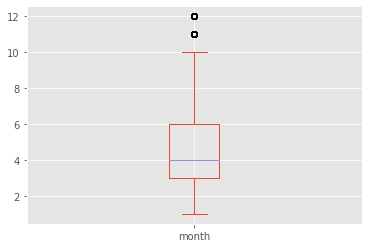

In [15]:
Avger['month'].plot(kind='box')

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [17]:
Avger[Avger['year']==2022]['text']

0       @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...
1       @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...
2       @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...
3       @kentrodexia Λόγω της απουσίας πραγματικής δημ...
4       @kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είν...
                              ...                        
1459    RT @XrPanag: Εξαιρετικά δυσάρεστη απόφαση για ...
1460    @RT_com's account has been withheld in Belgium...
1461    RT @OpenNewsGr: Έσχατο όπλο οι κυρώσεις, θα ση...
1462    RT @OpenNewsGr: Η ανταπόκριση του Θανάση Αυγερ...
1463    RT @Kosmodromio_gr: 2022, μπες με… ένα τραγούδ...
Name: text, Length: 1464, dtype: object

In [18]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
text = Avger['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [19]:
text = Avger[Avger['year']==2020]['text'].str.cat(sep = '.').replace("amp", ' ')
text

'RT @XrPanag: Το τελευταίο δελτίο του χρόνου από το @OpenNewsGr. Στις 18.50 με τον @ipapadopoulos. @MARIAZAHARAKI @AvgerinosMoscow @mignatio….RT @mazzenilsson: What does it look like when you “liberate” a country that hasn’t asked for it, when you unleash a violent chain of events….RT @EmbassyofRussia: #OTD in 1922, the Union of Soviet Socialist Republics (USSR), one of the largest states ever existed, was established.….RT @st_stavropoulos: Τώρα που μπαίνουμε στα 200 χρόνια από το 1821,οι αντικληρικανοι (του ευγενούς κλάδου των ευρωλιγουρηδων), ας προσπαθήσ….RT @GeorgeTetradis: Οι ηλίθιοι φασίστες που επιτίθενται στίς "Πλειάδες"επειδή ψώνισε ο Μητσοτάκης από κει, δεν ξερουν ότι το βιβλιοπωλείο ε….RT @st_stavropoulos: "Αριστεροί" που επιτίθενται σε βιβλιοπωλείο, ως άλλοι ναζηδες, επειδή από αυτό ψώνισε βιβλία ο Μητσοτάκης, είναι αχθος….RT @XrPanag: Ο @AvgerinosMoscow στο δελτίο του @OpenNewsGr. @MARIAZAHARAKI @alexiatasouli.RT @OpenNewsGr: Η Μόσχα ρίχνει γέφυρες στο καθεστώς Σάρατζ – Ού

In [20]:
list(STOPWORDS)[0:20]

['was',
 "couldn't",
 'her',
 'however',
 "they'd",
 'where',
 'again',
 'have',
 'just',
 'www',
 'if',
 'were',
 'his',
 'during',
 'against',
 'once',
 'ours',
 "who's",
 'from',
 'the']

In [21]:
import spacy
!python -m spacy download el_core_news_sm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 6.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [22]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['ήττον',
 'του',
 'τόσων',
 'τίποτε',
 'επάνω',
 'εσύ',
 'ωσότου',
 'έτερη',
 'έτερον',
 'μόνων',
 'διαρκώς',
 'μεθαύριο',
 'τούτοις',
 'πριν',
 'δίπλα',
 'ετούτης',
 'όλη',
 'ίσια',
 'συχνούς',
 'ιιι']

In [23]:
text = Avger['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'@kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς του 21ου αιώνα και κάνατε παραγραφή των προηγούμενων εγκλημάτων και όλως τυχαίως μαζί με τους εγκληματίες των παραγραφέντων θέλετε να ορίζετε για πάντα τις τύχες του πλανήτη ολόκληρου Ευτυχώς@kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες", γιατί αλλιώς θα γέμιζε αποικίες ο κόσμος να ρουφάμε αίμα, θα γενοκτονούσαμε πληθυσμούς (Ινδιάνους, μαύρους, Παλαιστίνιους κοκ), θα ρίχναμε ατομικές βόμβες, θα ισοπεδώναμε #Vietnam, #Yugoslavia, #Iraq etc &; θα μας χειροκροτούσαν "κεντροδεξιοί"@chrismouzeviris Δεν υπάρχει χώρα, που με τόσο προκλητικό τρόπο οι εθνικιστικές ηγεσίες της ηρωοποίησαν τους συνεργάτες με τους Ναζί, μεγαλώνουν τα παιδιά τους με ναζιστικό μίσος &; εκπαίδευση εναντίον των "άλλων", δημιουργούν συστηματικά δηλαδή νεοναζί γενίτσαρους Χωρίς #Bandera όλα ακατανόητα@kentrodexia Λόγω της απουσίας πραγματικής δημοκρατίας, αποικιοκρατικής λογικής,  εξάρθρωσης κινημάτων, διαφθοράς, παρακμής προσωπικού, οι ηγέτες της Δύσης πιστεύουν στον ίδιο

In [24]:
from PIL import Image
import numpy as np

In [25]:
doc = nlp(Avger['text'][1])

In [26]:
for token in doc:
    print(token, token.lemma_)

@kentrodexia @kentrodexia
Ευτυχώς ευτυχώς
που που
υπάρχουν υπάρχω
" "
δημοκράτες δημοκράτης
" "
, ,
γιατί γιατί
αλλιώς αλλιώ
θα θα
γέμιζε γέμιζε
αποικίες αποικία
ο ο
κόσμος κόσμος
να να
ρουφάμε ρουφάμε
αίμα αίμα
, ,
θα θα
γενοκτονούσαμε γενοκτονούσαμε
πληθυσμούς πληθυσμός
( (
Ινδιάνους Ινδιάνους
, ,
μαύρους μαύρος
, ,
Παλαιστίνιους Παλαιστίνιος
κ.ο.κ. κ.ο.κ.ς
) )
, ,
θα θα
ρίχναμε ρίχναμε
ατομικές ατομικός
βόμβες βόμβες
, ,
θα θα
ισοπεδώναμε ισοπεδώναμε
# #
Vietnam Vietnam
, ,
# #
Yugoslavia Yugoslavia
, ,
# #
Iraq Iraq
etc etc
& &
amp amp
; ;
θα θα
μας εγώ
χειροκροτούσαν χειροκροτούσαν
" "
κεντροδεξιοί κεντροδεξιοί
" "


In [27]:
' '.join(token.lemma_ for token in doc)

'@kentrodexia ευτυχώς που υπάρχω " δημοκράτης " , γιατί αλλιώ θα γέμιζε αποικία ο κόσμος να ρουφάμε αίμα , θα γενοκτονούσαμε πληθυσμός ( Ινδιάνους , μαύρος , Παλαιστίνιος κ.ο.κ.ς ) , θα ρίχναμε ατομικός βόμβες , θα ισοπεδώναμε # Vietnam , # Yugoslavia , # Iraq etc & amp ; θα εγώ χειροκροτούσαν " κεντροδεξιοί "'

In [28]:
text

'@kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς του 21ου αιώνα και κάνατε παραγραφή των προηγούμενων εγκλημάτων και όλως τυχαίως μαζί με τους εγκληματίες των παραγραφέντων θέλετε να ορίζετε για πάντα τις τύχες του πλανήτη ολόκληρου Ευτυχώς@kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες", γιατί αλλιώς θα γέμιζε αποικίες ο κόσμος να ρουφάμε αίμα, θα γενοκτονούσαμε πληθυσμούς (Ινδιάνους, μαύρους, Παλαιστίνιους κοκ), θα ρίχναμε ατομικές βόμβες, θα ισοπεδώναμε #Vietnam, #Yugoslavia, #Iraq etc &; θα μας χειροκροτούσαν "κεντροδεξιοί"@chrismouzeviris Δεν υπάρχει χώρα, που με τόσο προκλητικό τρόπο οι εθνικιστικές ηγεσίες της ηρωοποίησαν τους συνεργάτες με τους Ναζί, μεγαλώνουν τα παιδιά τους με ναζιστικό μίσος &; εκπαίδευση εναντίον των "άλλων", δημιουργούν συστηματικά δηλαδή νεοναζί γενίτσαρους Χωρίς #Bandera όλα ακατανόητα@kentrodexia Λόγω της απουσίας πραγματικής δημοκρατίας, αποικιοκρατικής λογικής,  εξάρθρωσης κινημάτων, διαφθοράς, παρακμής προσωπικού, οι ηγέτες της Δύσης πιστεύουν στον ίδιο

In [29]:
full_doc = nlp(text)

In [30]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [31]:
clear_text[200:400]

'ανήτη ολόκληρος ευτυχώς@kentrodexia ευτυχώς που υπάρχω " δημοκράτης " , γιατί αλλιώ θα γέμιζε αποικία ο κόσμος να ρουφάμε αίμα , θα γενοκτονούσαμε πληθυσμός ( Ινδιάνους , μαύρος , Παλαιστίνιος κοκ ) ,'

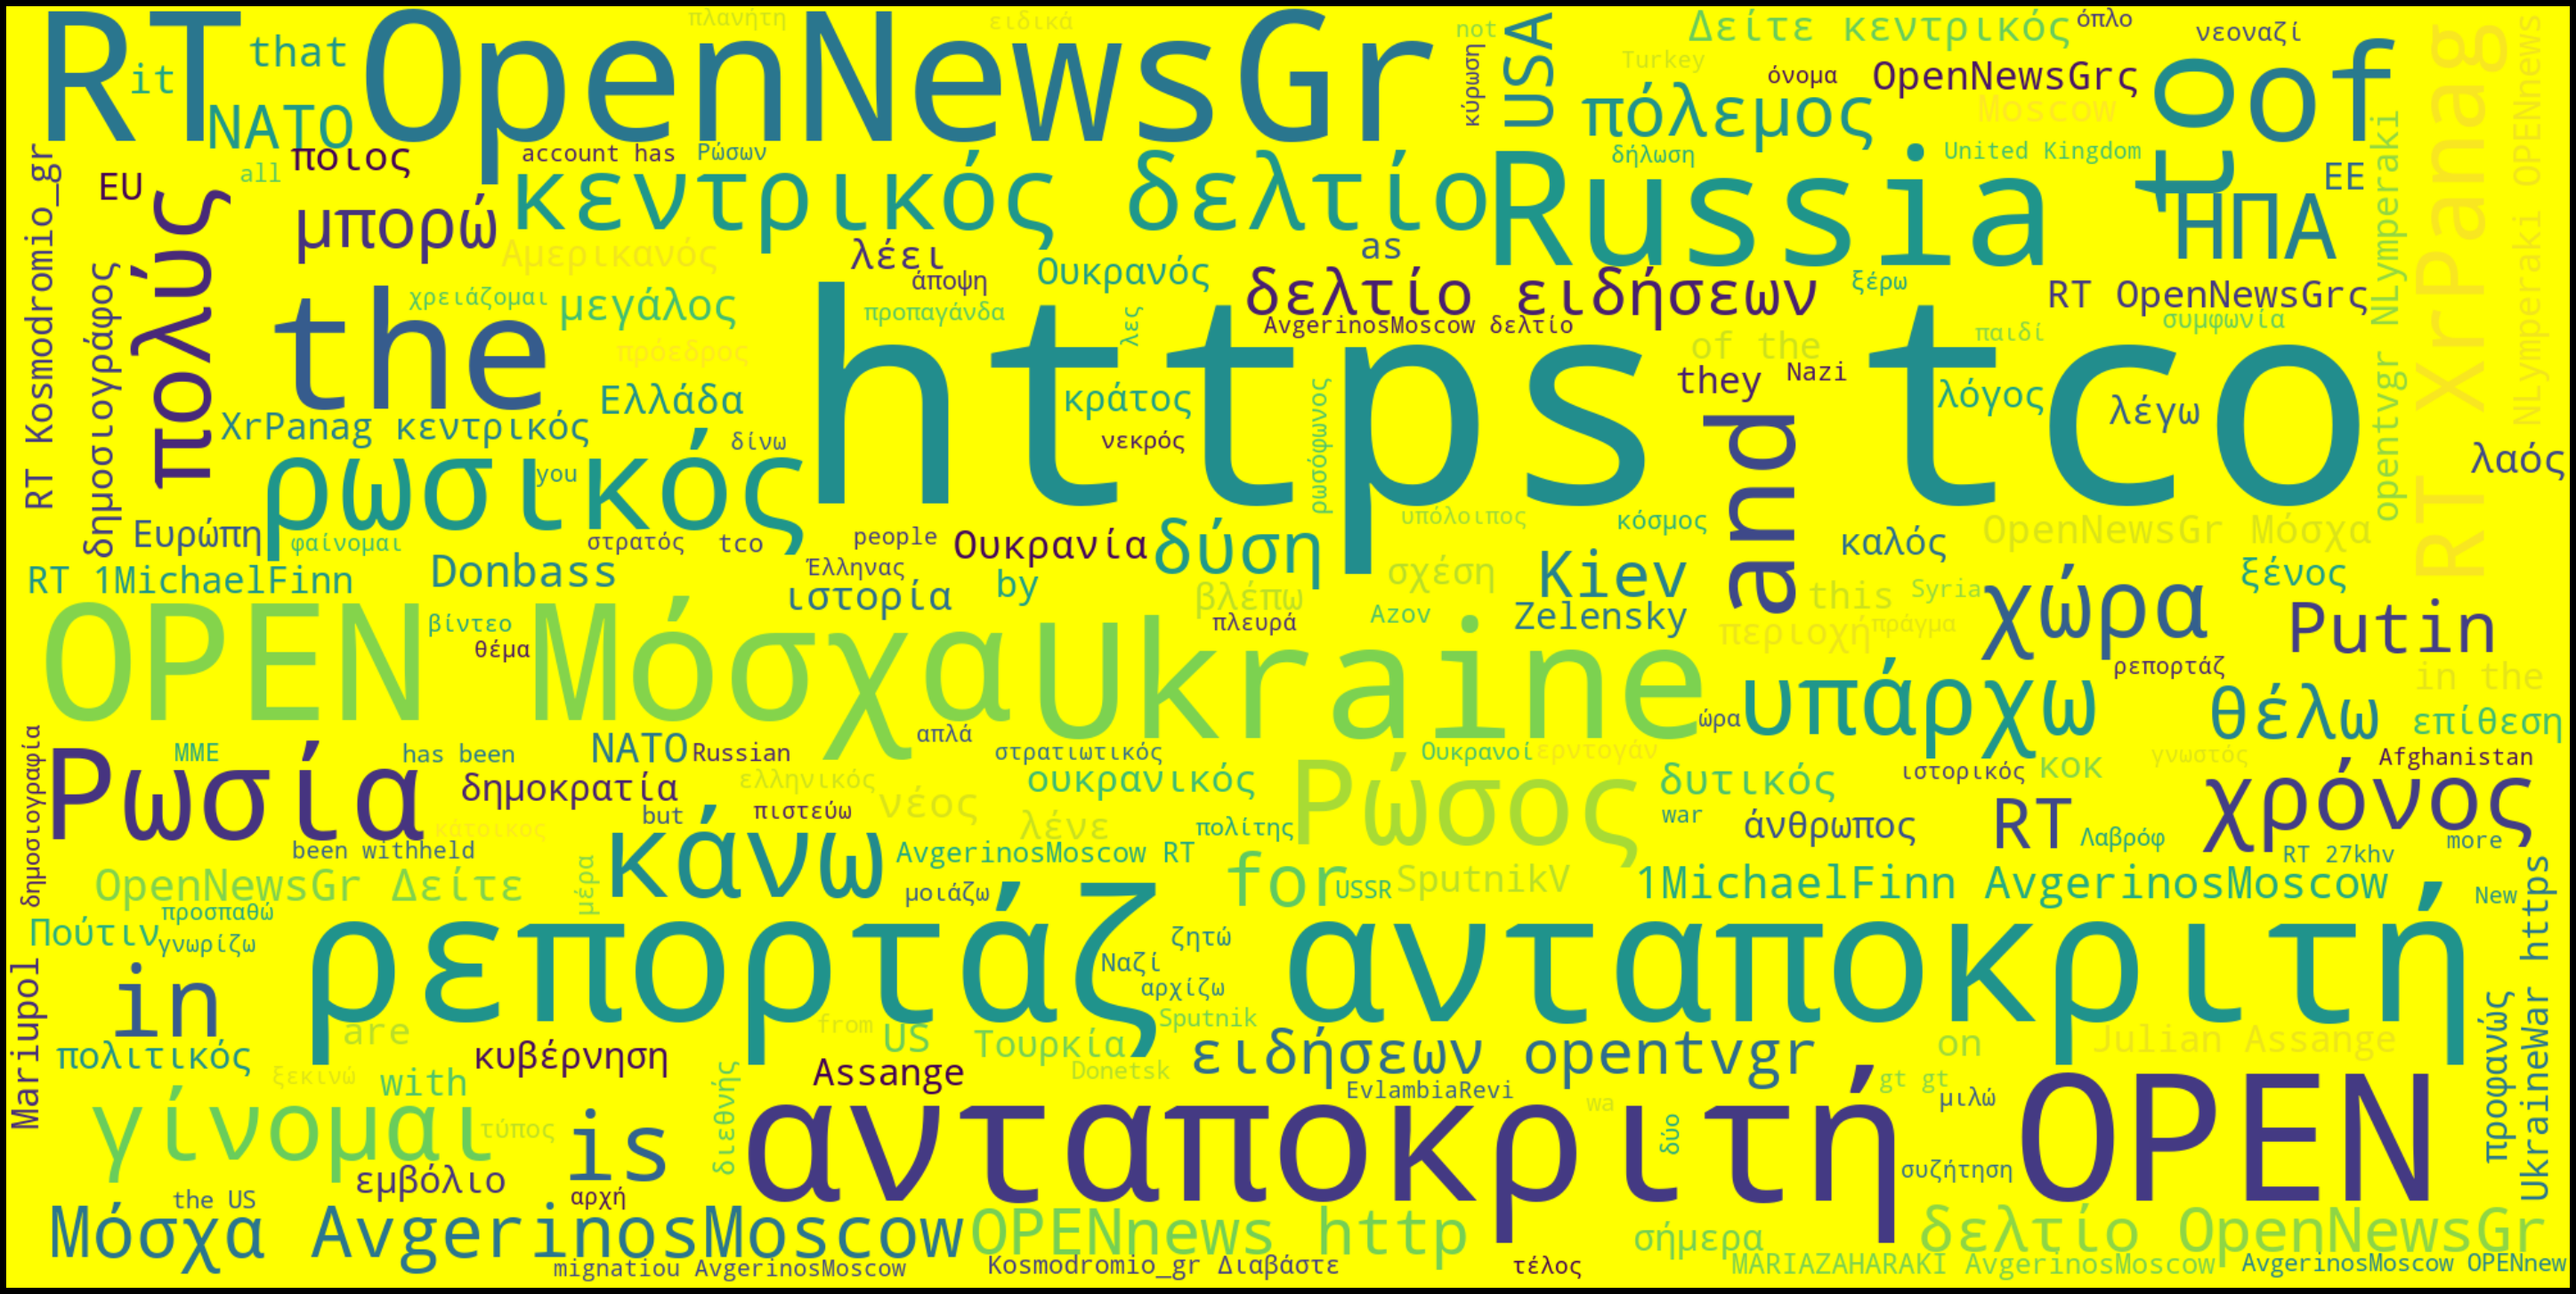

In [32]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words, 
    width = 2000,
    height = 1000,
    background_color = 'yellow'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
from collections import Counter
Counter(" ".join(Avger["text"]).split()).most_common(16)

[('RT', 1770),
 ('του', 1706),
 ('και', 1330),
 ('να', 1167),
 ('το', 1087),
 ('για', 899),
 ('της', 799),
 ('η', 769),
 ('που', 766),
 ('με', 741),
 ('από', 695),
 ('@OpenNewsGr:', 653),
 ('την', 631),
 ('&amp;', 608),
 ('Το', 586),
 ('τα', 581)]

In [34]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

ήττον


In [35]:
Avger['text_no_stopwords'] = Avger['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
Avger['text_no_stopwords'] = Avger['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
Avger['clean_text_no_stopwords'] = Avger['text']
#for stopword in nlp.Defaults.stop_words:
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [36]:
freq = Counter(" ".join(Avger["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('RT', 1770),
 ('@OpenNewsGr', 812),
 ('&;', 608),
 ('Το', 586),
 ('|', 459),
 ('the', 422),
 ('ρεπορτάζ', 407),
 ('Μόσχα', 387),
 ('@AvgerinosMoscow', 318),
 ('ανταποκριτή', 314),
 ('OPEN', 299),
 ('Η', 270),
 ('-', 263),
 ('in', 253),
 ('to', 250),
 ('of', 242)]

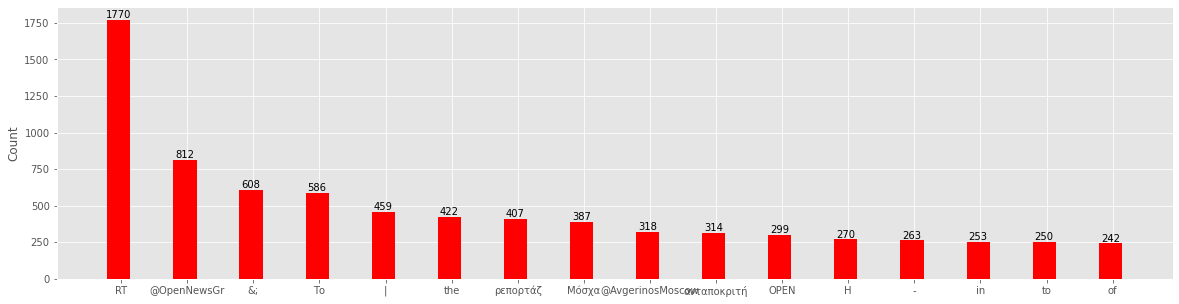

In [37]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

# Vectorizing Avgerdf



In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [39]:
count_vector = cv.fit_transform(Avger['text'])

In [40]:
count_vector.shape

(3205, 17368)

In [41]:
cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000  01  03  04  06  07  0b01hez5nj  0blhp5krth  0bobfxvkjy  ...  \
0   0    0   0   0   0   0   0           0           0           0  ...   
1   0    0   0   0   0   0   0           0           0           0  ...   
2   0    0   0   0   0   0   0           0           0           0  ...   
3   0    0   0   0   0   0   0           0           0           0  ...   
4   0    0   0   0   0   0   0           0           0           0  ...   

   художественной  художника  шестакова  эрдоган  юрия  являются  ἀγώνας  \
0               0          0          0        0     0         0       0   
1               0          0          0        0     0         0       0   
2               0          0          0        0     0         0       0   
3               0          0          0        0     0         0       0   
4               0          0          0        0     0         0       0   

   ἀλεξὰντρ  ἐλευθερία  ἐραστὴς  
0         0          0        0  
1         0          0        0  
2         0          0        0  
3         0          0        0  
4         0          0        0  

[5 rows x 17368 columns]

In [42]:
#cv.vocabulary_

In [43]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [44]:
count_vector = cv.fit_transform(Avger['text'])

In [45]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


18  1michaelfinn  2014  27khv  50  alexiatasouli  amp  and  are  as  ...  \
0   0             0     0      0   0              0    0    0    0   0  ...   
1   0             0     0      0   0              0    1    0    0   0  ...   
2   0             0     0      0   0              0    1    0    0   0  ...   
3   0             0     0      0   0              0    1    0    0   0  ...   
4   0             0     0      0   0              0    2    0    0   0  ...   

   ρωσικό  ρώσοι  ρώσους  σήμερα  τουρκία  υπάρχει  υπάρχουν  χρόνια  χώρα  \
0       0      0       0       0        0        0         0       0     0   
1       0      0       0       0        0        0         1       0     0   
2       0      0       0       0        0        1         0       0     1   
3       0      0       0       0        0        0         0       0     0   
4       0      0       0       0        0        0         0       0     0   

   χώρες  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 126 columns]

In [46]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [47]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(Avger['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


...  18.50  18:50  2014  @1michaelfinn  @27khv  @alexiatasouli  \
0    1      0      0     0              0       0               0   
1    0      0      0     0              0       0               0   
2    0      0      0     0              0       0               0   
3    0      0      0     0              0       0               0   
4    0      0      0     0              0       0               0   

   @avgerinosmoscow  @defenseassange  @ipapadopoulos  ...  σήμερα  σε ο  \
0                 0                0               0  ...       0     0   
1                 0                0               0  ...       0     0   
2                 0                0               0  ...       0     0   
3                 0                0               0  ...       0     1   
4                 0                0               0  ...       0     0   

   στρατός  συμφωνία  σχέση  τουρκία  τύπος  υπάρχω  χρόνος  χώρα  
0        0         0      0        0      0       0       0     0  
1        0         0      0        0      0       1       0     0  
2        0         0      0        0      0       1       0     1  
3        0         0      0        0      0       0       0     0  
4        0         0      0        0      0       0       0     0  

[5 rows x 140 columns]

In [48]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Avger['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


amp  avgerinosmoscow  co  https  in  of  open  opennews  opennewsgr  rt  \
0    0                0   0      0   0   0     0         0           0   0   
1    1                0   0      0   0   0     0         0           0   0   
2    1                0   0      0   0   0     0         0           0   0   
3    1                0   0      0   0   0     0         0           0   0   
4    2                0   0      0   0   0     0         0           0   0   

   russia  the  to  ukraine  xrpanag  ανταποκριτή  δελτίο  κι  μόσχα  ρεπορτάζ  
0       0    0   0        0        0            0       0   0      0         0  
1       0    0   0        0        0            0       0   0      0         0  
2       0    0   0        0        0            0       0   0      0         0  
3       0    0   0        0        0            0       0   0      0         0  
4       1    0   0        0        0            0       0   0      0         0

In [49]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\ουκ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Avger['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ουκασένκο  ουκιά  ουκρ  ουκρανία  ουκρανίας  ουκρανικά  ουκρανικές  \
0          0      0     0         0          0          0           0   
1          0      0     0         0          0          0           0   
2          0      0     0         0          0          0           0   
3          0      0     0         0          0          0           0   
4          0      0     0         0          0          0           0   

   ουκρανική  ουκρανικής  ουκρανικού  ουκρανικούς  ουκρανικό  ουκρανικός  \
0          0           0           0            0          0           0   
1          0           0           0            0          0           0   
2          0           0           0            0          0           0   
3          0           0           0            0          0           0   
4          0           0           0            0          0           0   

   ουκρανικών  ουκρανοί  ουκρανοποίηση  ουκρανού  ουκρανούς  ουκρανός  \
0           0         0              0         0          0         0   
1           0         0              0         0          0         0   
2           0         0              0         0          0         0   
3           0         0              0         0          0         0   
4           0         0              0         0          0         0   

   ουκρανών  
0         0  
1         0  
2         0  
3         0  
4         0

In [50]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bουκ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Avger['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


18 50  1michaelfinn avgerinosmoscow  https co  open μόσχα  opennews https  \
0      0                             0         0           0               0   
1      0                             0         0           0               0   
2      0                             0         0           0               0   
3      0                             0         0           0               0   
4      0                             0         0           0               0   

   opennewsgr δείτε  opennewsgr μόσχα  opentvgr 18  rt 1michaelfinn  \
0                 0                 0            0                0   
1                 0                 0            0                0   
2                 0                 0            0                0   
3                 0                 0            0                0   
4                 0                 0            0                0   

   rt kosmodromio_gr  rt opennewsgr  rt xrpanag  ανταποκριτή open  \
0                  0              0           0                 0   
1                  0              0           0                 0   
2                  0              0           0                 0   
3                  0              0           0                 0   
4                  0              0           0                 0   

   δείτε κεντρικό  δελτίο opennewsgr  δελτίο ειδήσεων  ειδήσεων opentvgr  \
0               0                  0                0                  0   
1               0                  0                0                  0   
2               0                  0                0                  0   
3               0                  0                0                  0   
4               0                  0                0                  0   

   κεντρικό δελτίο  μόσχα avgerinosmoscow  ρεπορτάζ ανταποκριτή  
0                0                      0                     0  
1                0                      0                     0  
2                0                      0                     0  
3                0                      0                     0  
4                0                      0                     0

In [51]:
results.sum(axis =0).sort_values(ascending = False)

https co                        1319
rt opennewsgr                    653
ρεπορτάζ ανταποκριτή             319
ανταποκριτή open                 299
open μόσχα                       253
rt xrpanag                       167
κεντρικό δελτίο                  131
18 50                            126
μόσχα avgerinosmoscow            102
δελτίο opennewsgr                 97
rt kosmodromio_gr                 83
δελτίο ειδήσεων                   83
opennews https                    82
rt 1michaelfinn                   79
opennewsgr δείτε                  78
ειδήσεων opentvgr                 76
1michaelfinn avgerinosmoscow      75
opentvgr 18                       65
δείτε κεντρικό                    65
opennewsgr μόσχα                  58
dtype: int64

In [52]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head() 

https co                1319
rt opennewsgr            653
ρεπορτάζ ανταποκριτή     319
ανταποκριτή open         299
open μόσχα               253
dtype: int64

In [53]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bουκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Avger['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


cover  coverage  covered  covering  covid  covid-19  covid1  covid19  \
0      0         0        0         0      0         0       0        0   
1      0         0        0         0      0         0       0        0   
2      0         0        0         0      0         0       0        0   
3      0         0        0         0      0         0       0        0   
4      0         0        0         0      0         0       0        0   

   covid_19  
0         0  
1         0  
2         0  
3         0  
4         0

In [54]:
results.sum(axis =0).sort_values(ascending = False)

covid19     11
covid        7
covid-19     7
covered      3
cover        2
covering     2
covid_19     2
coverage     1
covid1       1
dtype: int64

In [55]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['ουκρανια', 'πολεμος', 'ρωσια']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Avger['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ουκρανια  πολεμος  ρωσια
0         0        0      0
1         0        0      0
2         0        0      0
3         0        0      0
4         0        0      0

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(Avger['text'])  #finds the tfidf score with normalization

In [58]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000   10   13   18   19  1michaelfinn   20  2014  27khv  ...  χρόνο  \
0  0.0  0.0  0.0  0.0  0.0  0.0           0.0  0.0   0.0    0.0  ...    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0           0.0  0.0   0.0    0.0  ...    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0           0.0  0.0   0.0    0.0  ...    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0           0.0  0.0   0.0    0.0  ...    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0           0.0  0.0   0.0    0.0  ...    0.0   

   χτύπημα      χώρα  χώρας  χώρες  όνομα  όντως  όπλα  ώρα  ώρες  
0      0.0  0.000000    0.0    0.0    0.0    0.0   0.0  0.0   0.0  
1      0.0  0.000000    0.0    0.0    0.0    0.0   0.0  0.0   0.0  
2      0.0  0.382705    0.0    0.0    0.0    0.0   0.0  0.0   0.0  
3      0.0  0.000000    0.0    0.0    0.0    0.0   0.0  0.0   0.0  
4      0.0  0.000000    0.0    0.0    0.0    0.0   0.0  0.0   0.0  

[5 rows x 500 columns]

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.21136143 0.         ... 0.         0.         0.        ]]


In [60]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.21136143 0.         ... 0.         0.         0.        ]
 [0.21136143 1.         0.04622773 ... 0.         0.         0.        ]
 [0.         0.04622773 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.17567953 0.12237146]
 [0.         0.         0.         ... 0.17567953 1.         0.        ]
 [0.         0.         0.         ... 0.12237146 0.         1.        ]]


In [61]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

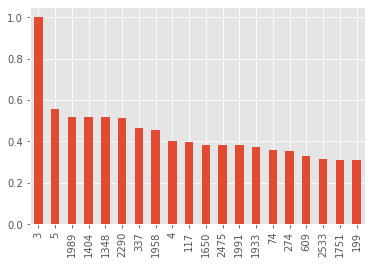

In [62]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [63]:
Avger['text'].loc[3]

'@kentrodexia Λόγω της απουσίας πραγματικής δημοκρατίας, αποικιοκρατικής λογικής,  εξάρθρωσης κινημάτων, διαφθοράς, παρακμής προσωπικού, οι ηγέτες της Δύσης πιστεύουν στον ίδιο τους το μύθο &amp; θεωρούν εαυτούς ανίκητους. Έχουν αιματοκυλίσει δε 100ντάδες λαούς, όποτε είναι αστείο και που μιλάνε.'

In [64]:
Avger['text'].loc[2823]

'Το τελευταίο σοφό πράγμα, που θα μπορούσε να κάνει ο @realDonaldTrump η απόδοση χάρης στον ιδρυτή των @wikileaks #Assange #FreeAssangeNOW #DontKillAssangeUSA https://t.co/RwBYiC0UMJ'

# Emolex Avgerdf

In [65]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [66]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [67]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [68]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [69]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [70]:
Avger_tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Avger.tsv", sep='\t')

In [71]:
len(Avger_tweets_df)

3205

In [72]:
short_tweets_Avger = Avger_tweets_df[['created_at','full_text' ]]
short_tweets_Avger = short_tweets_Avger.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [73]:
short_tweets_Avger.tail()

date  \
3200  Sat Nov 14 22:01:50 +0000 2020   
3201  Sat Nov 14 20:01:49 +0000 2020   
3202  Sat Nov 14 19:56:46 +0000 2020   
3203  Sat Nov 14 19:54:00 +0000 2020   
3204  Sat Nov 14 18:14:58 +0000 2020   

                                                   text  
3200  @Spysun04 @CostantinoWlami Ισχύει ό,τι για όλο...  
3201  Ρωσο-αιγυπτιακές ναυτικές ασκήσεις «Γέφυρα Φιλ...  
3202  @MakisHellas1 Ευτυχώς που υπάρχεις εσύ να τους...  
3203  RT @OpenNewsGr: Συμπαραγωγή εμβολίου με πολλές...  
3204  Δεν είναι μυστικό, για όσους θέλουν να βλέπουν...

In [74]:
short_tweets_Avger.dtypes

date    object
text    object
dtype: object

In [75]:
short_tweets_Avger['date'] = pd.to_datetime(short_tweets_Avger['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [76]:
short_tweets_Avger['year'] = pd.DatetimeIndex(short_tweets_Avger['date']).year
short_tweets_Avger['month'] = pd.DatetimeIndex(short_tweets_Avger['date']).month
short_tweets_Avger['day'] = pd.DatetimeIndex(short_tweets_Avger['date']).day
short_tweets_Avger

date                                               text  \
0    2022-07-05 15:55:00  @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...   
1    2022-07-05 15:45:01  @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...   
2    2022-07-05 15:37:45  @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...   
3    2022-07-05 15:32:16  @kentrodexia Λόγω της απουσίας πραγματικής δημ...   
4    2022-07-05 15:25:37  @kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είν...   
...                  ...                                                ...   
3200 2020-11-14 22:01:50  @Spysun04 @CostantinoWlami Ισχύει ό,τι για όλο...   
3201 2020-11-14 20:01:49  Ρωσο-αιγυπτιακές ναυτικές ασκήσεις «Γέφυρα Φιλ...   
3202 2020-11-14 19:56:46  @MakisHellas1 Ευτυχώς που υπάρχεις εσύ να τους...   
3203 2020-11-14 19:54:00  RT @OpenNewsGr: Συμπαραγωγή εμβολίου με πολλές...   
3204 2020-11-14 18:14:58  Δεν είναι μυστικό, για όσους θέλουν να βλέπουν...   

      year  month  day  
0     2022      7    5  
1     2022      7    5  
2     2022      7    5  
3     2022      7    5  
4     2022      7    5  
...    ...    ...  ...  
3200  2020     11   14  
3201  2020     11   14  
3202  2020     11   14  
3203  2020     11   14  
3204  2020     11   14  

[3205 rows x 5 columns]

In [77]:
short_tweets_Avger.dtypes

date     datetime64[ns]
text             object
year              int64
month             int64
day               int64
dtype: object

In [78]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [79]:
short_tweets_Avger['text'] = short_tweets_Avger['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [80]:
short_tweets_Avger.head()

date                                               text  \
0 2022-07-05 15:55:00  @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...   
1 2022-07-05 15:45:01  @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...   
2 2022-07-05 15:37:45  @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...   
3 2022-07-05 15:32:16  @kentrodexia Λόγω της απουσίας πραγματικής δημ...   
4 2022-07-05 15:25:37  @kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είν...   

   year  month  day  
0  2022      7    5  
1  2022      7    5  
2  2022      7    5  
3  2022      7    5  
4  2022      7    5

In [81]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [82]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets_Avger['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [83]:
wordcount_df.shape

(3205, 13161)

In [84]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [85]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [86]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']


In [87]:
short_tweets_Avger.head(3)

date                                               text  \
0 2022-07-05 15:55:00  @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...   
1 2022-07-05 15:45:01  @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...   
2 2022-07-05 15:37:45  @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...   

   year  month  day  
0  2022      7    5  
1  2022      7    5  
2  2022      7    5

In [88]:
short_tweets_Avger['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets_Avger['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets_Avger['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets_Avger['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets_Avger['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets_Avger['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets_Avger['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets_Avger['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets_Avger['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets_Avger['fear'] = wordcount_df[fear_words].sum(axis=1)


In [89]:
short_tweets_Avger

date                                               text  \
0    2022-07-05 15:55:00  @kentrodexia Εντάξει, ευτυχώς που ήρθατε εσείς...   
1    2022-07-05 15:45:01  @kentrodexia Ευτυχώς που υπάρχουν "δημοκράτες"...   
2    2022-07-05 15:37:45  @chrismouzeviris Δεν υπάρχει χώρα, που με τόσο...   
3    2022-07-05 15:32:16  @kentrodexia Λόγω της απουσίας πραγματικής δημ...   
4    2022-07-05 15:25:37  @kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είν...   
...                  ...                                                ...   
3200 2020-11-14 22:01:50  @Spysun04 @CostantinoWlami Ισχύει ό,τι για όλο...   
3201 2020-11-14 20:01:49  Ρωσο-αιγυπτιακές ναυτικές ασκήσεις «Γέφυρα Φιλ...   
3202 2020-11-14 19:56:46  @MakisHellas1 Ευτυχώς που υπάρχεις εσύ να τους...   
3203 2020-11-14 19:54:00  RT @OpenNewsGr: Συμπαραγωγή εμβολίου με πολλές...   
3204 2020-11-14 18:14:58  Δεν είναι μυστικό, για όσους θέλουν να βλέπουν...   

      year  month  day  anger  positivity  joy  disgust  surprise  trust  \
0     2022      7    5      0           3    2        0         0      1   
1     2022      7    5      0           1    1        0         0      0   
2     2022      7    5      3           1    1        1         1      0   
3     2022      7    5      0           0    0        0         0      0   
4     2022      7    5      0           3    3        4         1      4   
...    ...    ...  ...    ...         ...  ...      ...       ...    ...   
3200  2020     11   14      0           0    0        0         0      0   
3201  2020     11   14      1           0    0        1         0      0   
3202  2020     11   14      0           1    1        0         0      0   
3203  2020     11   14      0           0    0        0         0      0   
3204  2020     11   14      0           0    0        1         0      1   

      anticipation  sadness  negative  fear  
0                0        0         0     0  
1                0        0         0     0  
2                0        1         3     1  
3                0        0         1     0  
4                2        2         3     1  
...            ...      ...       ...   ...  
3200             0        0         0     0  
3201             0        0         1     0  
3202             0        0         0     0  
3203             0        0         0     0  
3204             0        0         0     0  

[3205 rows x 15 columns]

In [90]:
max = 0
happiest_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['positivity'] > max:
    happiest_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['positivity']


happiest_tweet

'@alexkara1989 Αν θέλετε να κάνετε αυθαίρετες ερμηνείες σε τι αρέσκομαι ή προσπαθώ, μπορώ να αυθαιρετίσω κι εγώ. Προς το παρόν συζητάω, οπότε διευκρινίστε μας: 1) Η Επανάσταση του 1821 κι η Μικρασιατική Εκστρατεία ήταν αναθεωρητισμοί; 2) Υπάρχει καλός και κακός αναθεωρητισμός ή ιμπεριαλισμός;'

In [91]:
max = 0
negative_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['negative'] > max:
    negative_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['negative']


negative_tweet

'@greekphase @kostarvanitis Κάθε θάνατος προκαλεί θλίψη, η οποία δεν μπορεί, όμως να είναι επιλεκτική. Μέχρι σήμερα από το 2014 και τη βίαια ανατροπή του Γιανουκόβιτς στην #Ukraine έχουν δυστυχώς σκοτωθεί κατά τον ΟΑΣΕ 13-14.000 άνθρωποι στην εμφύλια σύρραξη...'

In [92]:
max = 0
saddest_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['sadness'] > max:
    saddest_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['sadness']

saddest_tweet

'Τι να κάνει κι ο εξόριστος Ουκρανός συνάδελφος, που εκδιώχθηκε από το #Kiev, χασκογελάει με το επίπεδο της δημοσιογραφίας μας: "Ο άρρωστος με καρκίνο, που μόλις συνήλθε από κώμα #Putin ήδη μιλάει 3 ώρες χωρίς διακοπή στο Φόρουμ Αγίας Πετρούπολης. Θαύματα της ρωσικής ιατρικής!"...  '

In [93]:
max = 0
fear_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['fear'] > max:
    fear_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['fear']

fear_tweet

'5 νεκροί, 20 τραυματίες από τυφλό χτύπημα με πολλαπλό εκτοξευτήρα από το πυροβολικό της #Ukraine κοντά στην παρόχθια οδό του ποταμού  #Kalmius στο #Donetsk. Ουδεμία "στρατιωτική" λογική στο χτύπημα, μόνο εκδίκηση και μόνο άμαχοι εκεί, τα μέτωπα είναι αλλού  '

In [94]:
max = 0
trust_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['trust'] > max:
    trust_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['trust']

trust_tweet

'@kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είναι το βασικό, η "μασημένη από πριν τροφή" είναι το βασικό. Ο Χίτλερ ηττήθηκε, ο Στάλιν νίκησε, με μεγάλες θυσίες, ίσως &amp; να ήταν πύρρειος η νίκη της #USSR τελικά αλλά τι σημασία έχει τώρα αυτό; Η #Russia ενδεχομένως &amp; να έχει διδαχθεί από λάθη της'

In [95]:
short_tweets_Avger.set_index('date' , inplace=True)

In [96]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

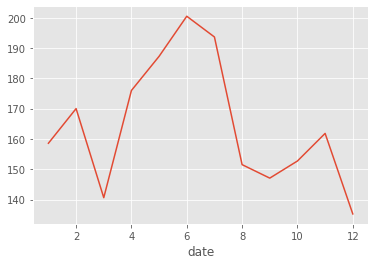

In [97]:
short_tweets_Avger['text'].str.len().groupby(by=short_tweets_Avger.index.month).mean().plot()

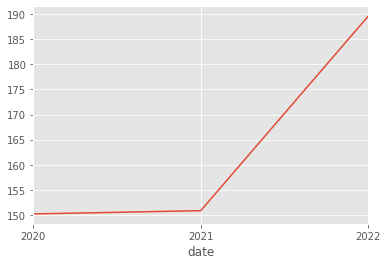

In [98]:
short_tweets_Avger['text'].str.len().resample('A').mean().plot() 

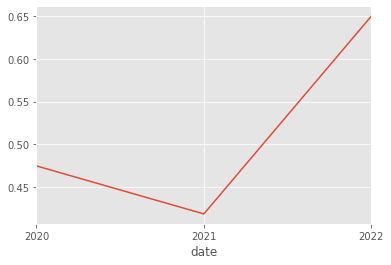

In [99]:
short_tweets_Avger['positivity'].resample('A').mean().plot() 

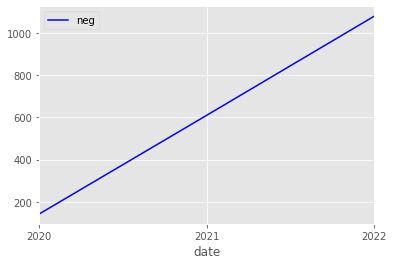

In [100]:
short_tweets_Avger['negative'].resample('A').sum().plot(color = 'b',label = 'neg').legend() 

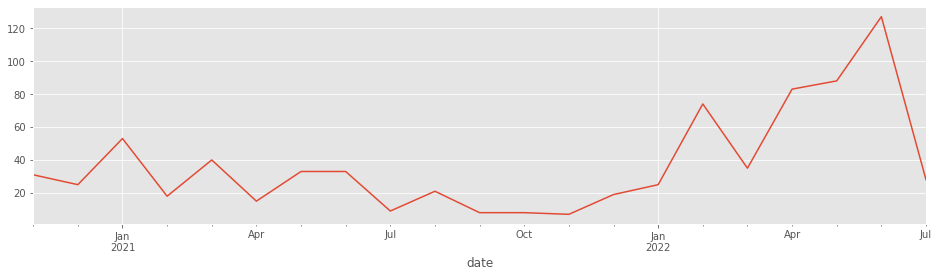

In [101]:
short_tweets_Avger['anger'].resample('M').sum().plot(figsize=(16,4))

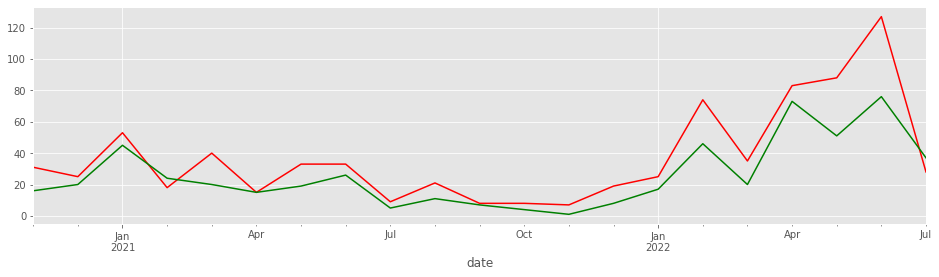

In [102]:
ax = short_tweets_Avger['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Avger['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

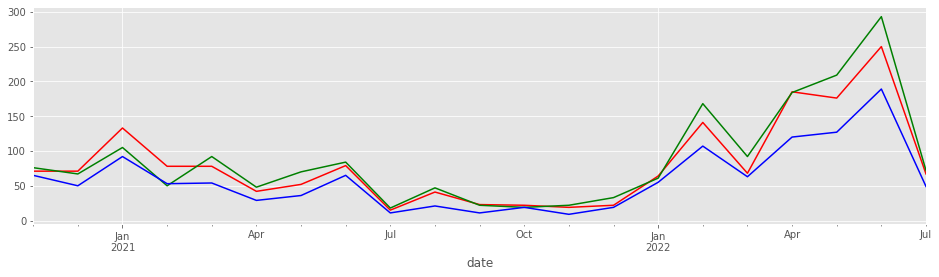

In [103]:
ax = short_tweets_Avger['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Avger['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets_Avger['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

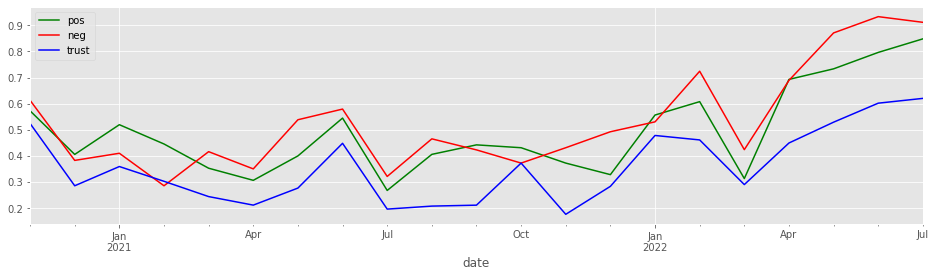

In [104]:
ax = short_tweets_Avger['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Avger['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Avger['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

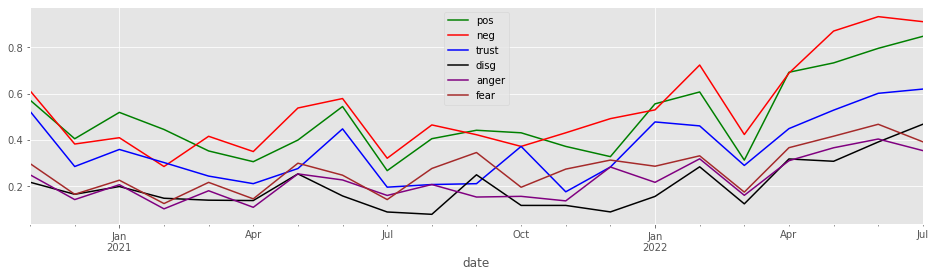

In [105]:
plt.style.use('ggplot')
ax = short_tweets_Avger['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Avger['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Avger['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

short_tweets_Avger['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

short_tweets_Avger['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

short_tweets_Avger['fear'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

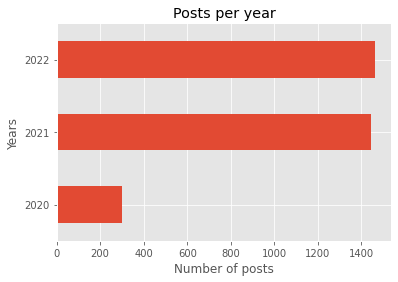

In [106]:
short_tweets_Avger['text'].groupby(by=short_tweets_Avger.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Month of the year')

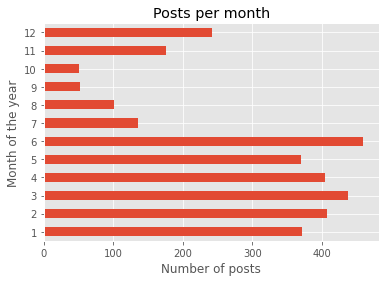

In [107]:
short_tweets_Avger['text'].groupby(by=short_tweets_Avger.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Month of the year")

Text(0, 0.5, 'Hour of the day')

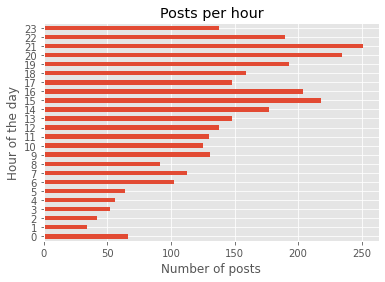

In [108]:
short_tweets_Avger['text'].groupby(by=short_tweets_Avger.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

# ONisenko
# https://twitter.com/Onisenko

In [109]:
Oni = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='Onisenko',count=200, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    Oni.append(tweet)

I Got: 199  tweets


In [110]:
pd.DataFrame(Oni)

created_at                   id               id_str  \
0    Tue Jul 05 06:33:32 +0000 2022  1544207834145083392  1544207834145083392   
1    Tue Jul 05 06:11:59 +0000 2022  1544202410058563584  1544202410058563584   
2    Mon Jul 04 18:29:52 +0000 2022  1544025718027276288  1544025718027276288   
3    Mon Jul 04 12:58:14 +0000 2022  1543942259711873026  1543942259711873026   
4    Sun Jul 03 21:00:44 +0000 2022  1543701295781003266  1543701295781003266   
..                              ...                  ...                  ...   
194  Mon May 02 20:27:29 +0000 2022  1521224881660219394  1521224881660219394   
195  Mon May 02 20:19:15 +0000 2022  1521222808453660672  1521222808453660672   
196  Mon May 02 19:45:11 +0000 2022  1521214235287638020  1521214235287638020   
197  Mon May 02 17:16:27 +0000 2022  1521176806547759105  1521176806547759105   
198  Mon May 02 16:37:37 +0000 2022  1521167034511511552  1521167034511511552   

                                             full_text  truncated  \
0    Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...      False   
1    Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...      False   
2    131η μέρα εισβολής - η φραουλολειχία της Μαρία...      False   
3    Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρω...      False   
4                @AikatBotsari https://t.co/JeTvI5MLcg      False   
..                                                 ...        ...   
194  Από το"η Ουκρανία έχει εμφύλιο τα τελευταία οκ...      False   
195  Και δεν ξεχνάμε ότι η κόρη του λαβρόφ, κατερίν...      False   
196                            https://t.co/ASys4ygV9M      False   
197  RT @AthensVoice: Η UEFA απέκλεισε τη Ρωσία από...      False   
198                            https://t.co/buzjxUV5FQ      False   

    display_text_range                                           entities  \
0             [0, 187]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 54]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2             [0, 109]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3             [0, 103]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4             [13, 13]  {'hashtags': [], 'symbols': [], 'user_mentions...   
..                 ...                                                ...   
194           [0, 156]  {'hashtags': [], 'symbols': [], 'user_mentions...   
195           [0, 124]  {'hashtags': [], 'symbols': [], 'user_mentions...   
196             [0, 0]  {'hashtags': [], 'symbols': [], 'user_mentions...   
197            [0, 99]  {'hashtags': [], 'symbols': [], 'user_mentions...   
198            [0, 23]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                source  in_reply_to_status_id  \
0    <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
1    <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
2    <a href="https://periscope.tv" rel="nofollow">...                    NaN   
3    <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
4    <a href="http://twitter.com/download/iphone" r...           1.543697e+18   
..                                                 ...                    ...   
194  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
195  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
196  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
197  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
198  <a href="https://mobile.twitter.com" rel="nofo...           1.521147e+18   

    in_reply_to_status_id_str  ...  favorited retweeted lang  \
0                        None  ...      False     False   el   
1                        None  ...      False     False   el   
2                        None  ...      False     False   el   
3                        None  ...      False     False   el   
4    

In [111]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='Onisenko',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        Oni.append(tweet)
# Number of tweets the user has made
print("I got :", len(Oni), " in total!!!")

I Got: 99  tweets more... Last ID: 1517749960074272771
I Got: 98  tweets more... Last ID: 1513494698618466306
I Got: 99  tweets more... Last ID: 1504542641555484678
I Got: 99  tweets more... Last ID: 1501082800992231425
I Got: 98  tweets more... Last ID: 1497292324556222464
I Got: 100  tweets more... Last ID: 1491792852916981760
I Got: 100  tweets more... Last ID: 1484939043204960256
I Got: 98  tweets more... Last ID: 1477980524438335488
I Got: 100  tweets more... Last ID: 1397273635568685061
I Got: 42  tweets more... Last ID: 438017211626946559
I got : 1132  in total!!!


In [112]:
# Number of tweets the user has made
print("I got :", len(Oni), " in total!!!")
#len(Oni)

I got : 1132  in total!!!


In [113]:
for tweet in Oni:
    print(tweet['created_at'],tweet['full_text'])

Tue Jul 05 06:33:32 +0000 2022 Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ένας από τους πυλώνες του φασιστικού καθεστώτος του κρεμλίνου μίλησε σήμερα για "ρεβανσιστικές διαθέσεις της Ιαπωνίας". Που πας ρε κακομοίρη!
Tue Jul 05 06:11:59 +0000 2022 Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε 4ο ράιχ.
Mon Jul 04 18:29:52 +0000 2022 131η μέρα εισβολής - η φραουλολειχία της Μαρίας και η υποκρισία ορισμένων “αριστεροί” https://t.co/O8P2PB3dew
Mon Jul 04 12:58:14 +0000 2022 Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρωσική εκκλησία δημιουργήθηκε με απόφαση του στάλιν το 1943
Sun Jul 03 21:00:44 +0000 2022 @AikatBotsari https://t.co/JeTvI5MLcg
Sun Jul 03 07:24:33 +0000 2022 RT @pravda_eng: Mother kisses her daughter for the last time at her funeral. She died during the shelling in the village Bezruky, Kharkiv o…
Sat Jul 02 21:32:11 +0000 2022 Η ταχύτητα με την οποία γεννιούνται τα ρωsSSο-τρολ ακάου ξεπερνάει την ταχύτητα με την οποία κάνω πλοκ. Είναι μια άνιση μάχη αλλά δεν τα παρατάω.
S

In [114]:
#Oni[0]

In [115]:
Oni_df = pd.DataFrame(Oni)
Oni_df.head()

created_at                   id               id_str  \
0  Tue Jul 05 06:33:32 +0000 2022  1544207834145083392  1544207834145083392   
1  Tue Jul 05 06:11:59 +0000 2022  1544202410058563584  1544202410058563584   
2  Mon Jul 04 18:29:52 +0000 2022  1544025718027276288  1544025718027276288   
3  Mon Jul 04 12:58:14 +0000 2022  1543942259711873026  1543942259711873026   
4  Sun Jul 03 21:00:44 +0000 2022  1543701295781003266  1543701295781003266   

                                           full_text  truncated  \
0  Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...      False   
1  Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...      False   
2  131η μέρα εισβολής - η φραουλολειχία της Μαρία...      False   
3  Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρω...      False   
4              @AikatBotsari https://t.co/JeTvI5MLcg      False   

  display_text_range                                           entities  \
0           [0, 187]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1            [0, 54]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 109]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3           [0, 103]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [13, 13]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                              source  in_reply_to_status_id  \
0  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
1  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
2  <a href="https://periscope.tv" rel="nofollow">...                    NaN   
3  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...           1.543697e+18   

  in_reply_to_status_id_str  ...  favorited retweeted lang possibly_sensitive  \
0                      None  ...      False     False   el                NaN   
1                      None  ...      False     False   el                NaN   
2                      None  ...      False     False   el              False   
3                      None  ...      False     False   el                NaN   
4       1543697258885124103  ...      False     False  qme              False   

                                   extended_entities retweeted_status  \
0                                                NaN              NaN   
1                                                NaN              NaN   
2                                                NaN              NaN   
3                                                NaN              NaN   
4  {'media': [{'id': 1543701290689101825, 'id_str...              NaN   

  quoted_status_id quoted_status_id_str  quoted_status_permalink  \
0              NaN                  NaN                      NaN   
1              NaN                  NaN                      NaN   
2              NaN                  NaN                      NaN   
3              NaN                  NaN                      NaN   
4              NaN                  NaN                      NaN   

   quoted_status  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 31 columns]

In [116]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [117]:
Oni_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/Oni.tsv", sep='\t')

# Επεξεργασία Onidf

In [118]:
Oni = Oni_df[['created_at','full_text' ]]
Oni = Oni.rename(columns={'created_at': 'date', 'full_text': 'text'} )
Oni

date  \
0     Tue Jul 05 06:33:32 +0000 2022   
1     Tue Jul 05 06:11:59 +0000 2022   
2     Mon Jul 04 18:29:52 +0000 2022   
3     Mon Jul 04 12:58:14 +0000 2022   
4     Sun Jul 03 21:00:44 +0000 2022   
...                              ...   
1127  Wed Apr 01 14:20:11 +0000 2020   
1128  Fri Sep 06 18:44:05 +0000 2019   
1129  Mon Apr 28 14:06:07 +0000 2014   
1130  Mon Apr 28 13:43:39 +0000 2014   
1131  Mon Feb 24 18:26:55 +0000 2014   

                                                   text  
0     Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...  
1     Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...  
2     131η μέρα εισβολής - η φραουλολειχία της Μαρία...  
3     Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρω...  
4                 @AikatBotsari https://t.co/JeTvI5MLcg  
...                                                 ...  
1127  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...  
1128  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...  
1129  @POPOVRTR Международная журналистика вас не за...  
1130  Simon Ostrovsky tells the full story of his ab...  
1131                 Στο μπλόκο! http://t.co/o7jiqGUNqr  

[1132 rows x 2 columns]

In [119]:
#Oni.dtypes

In [120]:
Oni['year'] = pd.DatetimeIndex(Oni['date']).year
Oni['month'] = pd.DatetimeIndex(Oni['date']).month
Oni['day'] = pd.DatetimeIndex(Oni['date']).day
Oni

date  \
0     Tue Jul 05 06:33:32 +0000 2022   
1     Tue Jul 05 06:11:59 +0000 2022   
2     Mon Jul 04 18:29:52 +0000 2022   
3     Mon Jul 04 12:58:14 +0000 2022   
4     Sun Jul 03 21:00:44 +0000 2022   
...                              ...   
1127  Wed Apr 01 14:20:11 +0000 2020   
1128  Fri Sep 06 18:44:05 +0000 2019   
1129  Mon Apr 28 14:06:07 +0000 2014   
1130  Mon Apr 28 13:43:39 +0000 2014   
1131  Mon Feb 24 18:26:55 +0000 2014   

                                                   text  year  month  day  
0     Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...  2022      7    5  
1     Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...  2022      7    5  
2     131η μέρα εισβολής - η φραουλολειχία της Μαρία...  2022      7    4  
3     Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρω...  2022      7    4  
4                 @AikatBotsari https://t.co/JeTvI5MLcg  2022      7    3  
...                                                 ...   ...    ...  ...  
1127  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...  2020      4    1  
1128  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...  2019      9    6  
1129  @POPOVRTR Международная журналистика вас не за...  2014      4   28  
1130  Simon Ostrovsky tells the full story of his ab...  2014      4   28  
1131                 Στο μπλόκο! http://t.co/o7jiqGUNqr  2014      2   24  

[1132 rows x 5 columns]

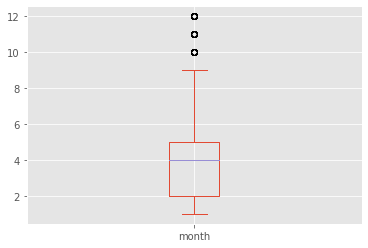

In [121]:
Oni['month'].plot(kind='box')

In [122]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [123]:
Oni[Oni['year']==2022]['text']

0      Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...
1      Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...
2      131η μέρα εισβολής - η φραουλολειχία της Μαρία...
3      Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρω...
4                  @AikatBotsari https://t.co/JeTvI5MLcg
                             ...                        
990    σύντομα στο παγκόσμιο βιβλιοπωλείο https://t.c...
991    Το βραβείο ηλιθιότητας πάει στον νοτιοκορεάτη,...
992    Ένα από τα πολλά πράγματα που είχε απαγορεύσει...
993    @Jorge_Irraizoz Κάνει πολλά λάθη ο Ζε. Κυρίως ...
994    Μίλησαν χθες Μπάιντεν με τον Ζελένσκι τηλεφωνι...
Name: text, Length: 995, dtype: object

In [124]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
text = Oni['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [125]:
text = Oni[Oni['year']==2022]['text'].str.cat(sep = '.').replace("amp", ' ')
text

'Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ένας από τους πυλώνες του φασιστικού καθεστώτος του κρεμλίνου μίλησε σήμερα για "ρεβανσιστικές διαθέσεις της Ιαπωνίας". Που πας ρε κακομοίρη!.Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε 4ο ράιχ..131η μέρα εισβολής - η φραουλολειχία της Μαρίας και η υποκρισία ορισμένων “αριστεροί” https://t.co/O8P2PB3dew.Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρωσική εκκλησία δημιουργήθηκε με απόφαση του στάλιν το 1943.@AikatBotsari https://t.co/JeTvI5MLcg.RT @pravda_eng: Mother kisses her daughter for the last time at her funeral. She died during the shelling in the village Bezruky, Kharkiv o….Η ταχύτητα με την οποία γεννιούνται τα ρωsSSο-τρολ ακάου ξεπερνάει την ταχύτητα με την οποία κάνω πλοκ. Είναι μια άνιση μάχη αλλά δεν τα παρατάω..@InfoWarriorNews άντε ρε πουλημένο τομάρι.129η μέρα εισβολής - θρίλερ με το Λισιτσιάνκ https://t.co/p8vaj3ICLc.RT @Gerashchenko_en: I keep thinking about this dog, red Fox. Russians beat him up, broke his paws, threw 

In [126]:
list(STOPWORDS)[0:20]

['was',
 "couldn't",
 'her',
 'however',
 "they'd",
 'where',
 'again',
 'have',
 'just',
 'www',
 'if',
 'were',
 'his',
 'during',
 'against',
 'once',
 'ours',
 "who's",
 'from',
 'the']

In [127]:
import spacy
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 8.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [128]:
nlp = spacy.load('el_core_news_sm')

In [129]:
list(nlp.Defaults.stop_words)[0:20]

['ήττον',
 'του',
 'τόσων',
 'τίποτε',
 'επάνω',
 'εσύ',
 'ωσότου',
 'έτερη',
 'έτερον',
 'μόνων',
 'διαρκώς',
 'μεθαύριο',
 'τούτοις',
 'πριν',
 'δίπλα',
 'ετούτης',
 'όλη',
 'ίσια',
 'συχνούς',
 'ιιι']

In [130]:
text = Oni['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ένας από τους πυλώνες του φασιστικού καθεστώτος του κρεμλίνου μίλησε σήμερα για "ρεβανσιστικές διαθέσεις της Ιαπωνίας" Που πας ρε κακομοίρη!Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε 4ο ράιχ131η μέρα εισβολής - η φραουλολειχία της Μαρίας και η υποκρισία ορισμένων “αριστεροί” https//tco/O8P2PB3dewΗ άχρηστη πληροφορία της ημέρας Η σημερινή ρωσική εκκλησία δημιουργήθηκε με απόφαση του στάλιν το 1943@AikatBotsari https//tco/JeTvI5MLcgRT @pravda_eng Mother kisses her daughter for the last time at her funeral She died during the shelling in the village Bezruky, Kharkiv o…Η ταχύτητα με την οποία γεννιούνται τα ρωsSSο-τρολ ακάου ξεπερνάει την ταχύτητα με την οποία κάνω πλοκ Είναι μια άνιση μάχη αλλά δεν τα παρατάω@InfoWarriorNews άντε ρε πουλημένο τομάρι129η μέρα εισβολής - θρίλερ με το Λισιτσιάνκ https//tco/p8vaj3ICLcRT @Gerashchenko_en I keep thinking about this dog, red Fox Russians beat him up, broke his paws, threw him in the dumpster and 

In [131]:
from PIL import Image
import numpy as np

In [132]:
doc = nlp(Oni['text'][1])

In [133]:
for token in doc:
    print(token, token.lemma_)

Ο ο
πούτιν πούτιν
ήθελε θέλω
να να
φτιάξει φτιάσσω
3η 3η
Ρώμη Ρώμη
και και
έφτιαξε έφτιαξε
4ο 4ο
ράιχ ράιχς
. .


In [134]:
' '.join(token.lemma_ for token in doc)

'ο πούτιν θέλω να φτιάσσω 3η Ρώμη και έφτιαξε 4ο ράιχς .'

In [135]:
text

'Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ένας από τους πυλώνες του φασιστικού καθεστώτος του κρεμλίνου μίλησε σήμερα για "ρεβανσιστικές διαθέσεις της Ιαπωνίας" Που πας ρε κακομοίρη!Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε 4ο ράιχ131η μέρα εισβολής - η φραουλολειχία της Μαρίας και η υποκρισία ορισμένων “αριστεροί” https//tco/O8P2PB3dewΗ άχρηστη πληροφορία της ημέρας Η σημερινή ρωσική εκκλησία δημιουργήθηκε με απόφαση του στάλιν το 1943@AikatBotsari https//tco/JeTvI5MLcgRT @pravda_eng Mother kisses her daughter for the last time at her funeral She died during the shelling in the village Bezruky, Kharkiv o…Η ταχύτητα με την οποία γεννιούνται τα ρωsSSο-τρολ ακάου ξεπερνάει την ταχύτητα με την οποία κάνω πλοκ Είναι μια άνιση μάχη αλλά δεν τα παρατάω@InfoWarriorNews άντε ρε πουλημένο τομάρι129η μέρα εισβολής - θρίλερ με το Λισιτσιάνκ https//tco/p8vaj3ICLcRT @Gerashchenko_en I keep thinking about this dog, red Fox Russians beat him up, broke his paws, threw him in the dumpster and 

In [136]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)
clear_text[200:400]

' Ρώμη και έφτιαξε 4ο ράιχ131η μέρα εισβολή - ο φραουλολειχία ο Μαρία και ο υποκρισία οριόμενσς “ αριστερός ” https//tco / O8P2PB3dewΗ άχρηστη πληροφορία ο ημέρα ο σημερινός ρωσικός εκκλησία δημιουργήθ'

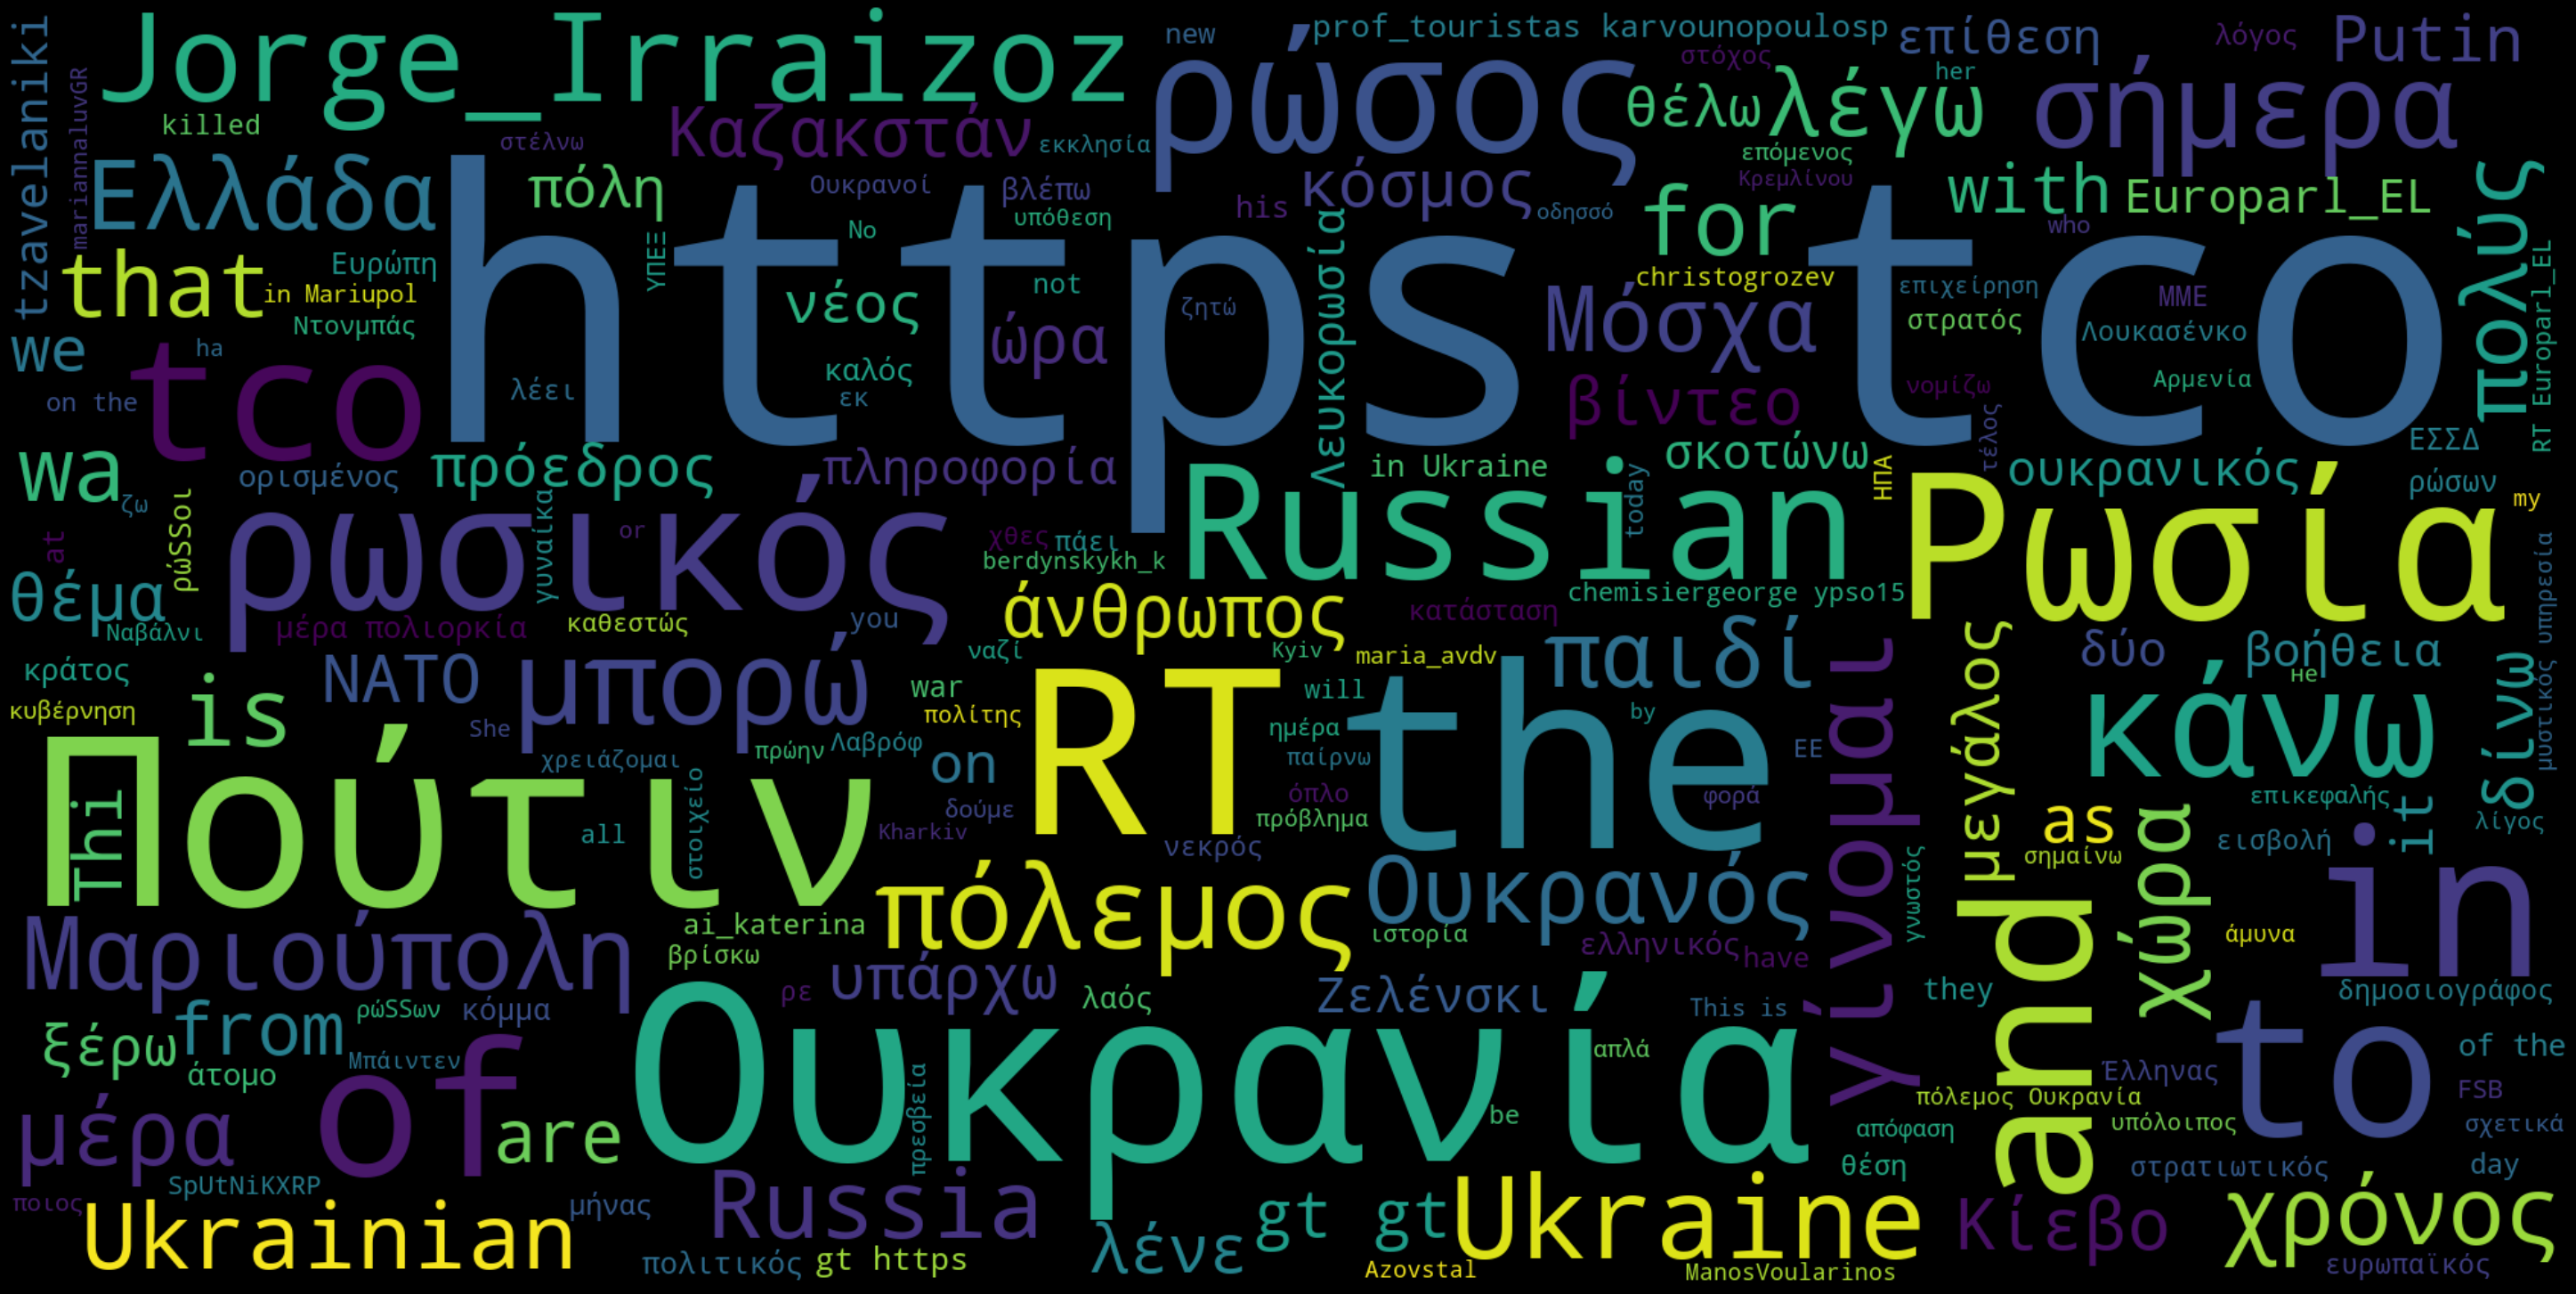

In [137]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [138]:
from collections import Counter
Counter(" ".join(Oni["text"]).split()).most_common(16)

[('και', 376),
 ('το', 337),
 ('να', 336),
 ('RT', 290),
 ('του', 287),
 ('της', 262),
 ('για', 246),
 ('από', 231),
 ('που', 208),
 ('την', 200),
 ('η', 197),
 ('με', 197),
 ('στην', 166),
 ('είναι', 160),
 ('στο', 158),
 ('ο', 156)]

In [139]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

ήττον


In [140]:
Oni['text_no_stopwords'] = Oni['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
Oni['text_no_stopwords'] = Oni['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
Oni['clean_text_no_stopwords'] = Oni['text']
#for stopword in nlp.Defaults.stop_words:
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [141]:
freq = Counter(" ".join(Oni["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('RT', 290),
 ('the', 118),
 ('-', 94),
 ('in', 92),
 ('Η', 85),
 ('of', 83),
 ('Ο', 82),
 ('a', 75),
 ('Πούτιν', 75),
 ('Ουκρανία', 70),
 ('to', 66),
 ('Οι', 51),
 ('Το', 51),
 ('and', 49),
 ('Ρωσία', 49),
 ('is', 42)]

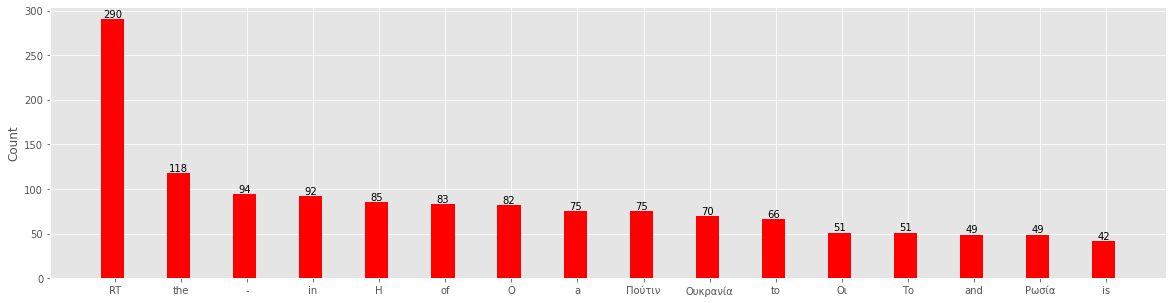

In [142]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

# vectorizing Onisenko

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [144]:
count_vector = cv.fit_transform(Oni['text'])

In [145]:
count_vector.shape

(1132, 7195)

In [146]:
#cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000  01  06  0c8uht7mgc  0scvc0pfeh  0tap5lzw5s  0tojppkope  10  100  \
0   0    0   0   0           0           0           0           0   0    0   
1   0    0   0   0           0           0           0           0   0    0   
2   0    0   0   0           0           0           0           0   0    0   
3   0    0   0   0           0           0           0           0   0    0   
4   0    0   0   0           0           0           0           0   0    0   

   ...  чтобы  чудом  шандор  швейцарии  это  южно  як  які  європарламенту  \
0  ...      0      0       0          0    0     0   0    0               0   
1  ...      0      0       0          0    0     0   0    0               0   
2  ...      0      0       0          0    0     0   0    0               0   
3  ...      0      0       0          0    0     0   0    0               0   
4  ...      0      0       0          0    0     0   0    0               0   

   ірпінь  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 7195 columns]

In [147]:
#cv.vocabulary_

In [148]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [149]:
count_vector = cv.fit_transform(Oni['text'])

In [150]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  ai_katerina  amp  and  are  as  at  by  co  europarl_el  ...  ρωσικής  \
0    0            0    0    0    0   0   0   0   0            0  ...        0   
1    0            0    0    0    0   0   0   0   0            0  ...        0   
2    0            0    0    0    0   0   0   0   1            0  ...        0   
3    0            0    0    0    0   0   0   0   0            0  ...        0   
4    0            0    0    0    0   0   0   0   1            0  ...        0   

   ρωσικό  ρώssοι  ρώσοι  ρώσους  ρώσων  σήμερα  υπάρχει  χρόνια  ώρα  
0       0       0      0       0      0       1        0       0    0  
1       0       0      0       0      0       0        0       0    0  
2       0       0      0       0      0       0        0       0    0  
3       0       0      0       0      0       0        0       0    0  
4       0       0      0       0      0       0        0       0    0  

[5 rows x 81 columns]

In [151]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [152]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Oni['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


...  @ai_katerina  @europarl_el  @jorge_irraizoz  @karvounopoulosp  \
0    0             0             0                0                 0   
1    0             0             0                0                 0   
2    0             0             0                0                 0   
3    0             0             0                0                 0   
4    0             0             0                0                 0   

   @prof_touristas  @tzavelaniki  and  are  for  ...  σήμερα  σε ο  σκοτώνω  \
0                0             0    0    0    0  ...       1     0        0   
1                0             0    0    0    0  ...       0     0        0   
2                0             0    0    0    0  ...       0     0        0   
3                0             0    0    0    0  ...       0     0        0   
4                0             0    0    0    0  ...       0     0        0   

   στρατιωτικός  στρατός  υπάρχω  υπηρεσία  χρόνος  χώρα  ώρα  
0             0        0       0         0       0     0    0  
1             0        0       0         0       0     0    0  
2             0        0       0         0       0     0    0  
3             0        0       0         0       0     0    0  
4             0        0       0         0       0     0    0  

[5 rows x 98 columns]

In [153]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Oni['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


and  co  gt  https  in  is  jorge_irraizoz  of  rt  russian  the  to  \
0    0   0   0      0   0   0               0   0   0        0    0   0   
1    0   0   0      0   0   0               0   0   0        0    0   0   
2    0   1   0      1   0   0               0   0   0        0    0   0   
3    0   0   0      0   0   0               0   0   0        0    0   0   
4    0   1   0      1   0   0               0   0   0        0    0   0   

   ukraine  μέρα  ουκρανία  ουκρανίας  πούτιν  ρωσία  ρώσοι  σήμερα  
0        0     0         0          0       0      0      0       1  
1        0     0         0          0       1      0      0       0  
2        0     1         0          0       0      0      0       0  
3        0     0         0          0       0      0      0       0  
4        0     0         0          0       0      0      0       0

In [154]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\ουκ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Oni['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ουκ  ουκασένκο  ουκρανία  ουκρανίας  ουκρανια  ουκρανικά  ουκρανικές  \
0    0          0         0          0         0          0           0   
1    0          0         0          0         0          0           0   
2    0          0         0          0         0          0           0   
3    0          0         0          0         0          0           0   
4    0          0         0          0         0          0           0   

   ουκρανική  ουκρανικής  ουκρανικού  ουκρανικό  ουκρανικών  ουκρανοί  \
0          0           0           0          0           0         0   
1          0           0           0          0           0         0   
2          0           0           0          0           0         0   
3          0           0           0          0           0         0   
4          0           0           0          0           0         0   

   ουκρανοι  ουκρανοποίηση  ουκρανού  ουκρανούς  ουκρανός  ουκρανών  \
0         0              0         0          0         0         0   
1         0              0         0          0         0         0   
2         0              0         0          0         0         0   
3         0              0         0          0         0         0   
4         0              0         0          0         0         0   

   ουκτρανική  
0           0  
1           0  
2           0  
3           0  
4           0

In [155]:
results.sum(axis =0).sort_values(ascending = False)

ουκρανία         96
ουκρανίας        41
ουκρανοί         17
ουκασένκο        12
ουκρανούς        11
ουκρανών         10
ουκρανικό         8
ουκρανική         5
ουκρανικού        5
ουκρανοι          5
ουκρανικές        4
ουκρανικά         3
ουκρανια          2
ουκρανικών        2
ουκρανός          2
ουκ               1
ουκρανού          1
ουκρανοποίηση     1
ουκρανικής        1
ουκτρανική        1
dtype: int64

In [156]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   

ουκρανία     96
ουκρανίας    41
ουκρανοί     17
ουκασένκο    12
ουκρανούς    11
dtype: int64

In [157]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bukraine[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Oni['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ukraine
0        0
1        0
2        0
3        0
4        0

In [158]:
results.sum(axis =0).sort_values(ascending = False)

ukraine    51
dtype: int64

In [159]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['Ukraine', 'Ουκρανία']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Oni['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Ukraine  Ουκρανία
0        0         0
1        0         0
2        0         0
3        0         0
4        0         0

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [161]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(Oni['text'])  #finds the tfidf score with normalization

In [162]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000   10  100   11   14   15   16   17   18  ...  χρόνια  χρόνο  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0    0.0   

   χτύπησαν  χώρα  χώρας  χώρες  όπλα  ώρα   на   не  
0       0.0   0.0    0.0    0.0   0.0  0.0  0.0  0.0  
1       0.0   0.0    0.0    0.0   0.0  0.0  0.0  0.0  
2       0.0   0.0    0.0    0.0   0.0  0.0  0.0  0.0  
3       0.0   0.0    0.0    0.0   0.0  0.0  0.0  0.0  
4       0.0   0.0    0.0    0.0   0.0  0.0  0.0  0.0  

[5 rows x 500 columns]

In [163]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements


cosine scores ==>  [[1. 0. 0. ... 0. 0. 0.]]


In [164]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements


cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.14060463 0.08952613 0.26479425]
 ...
 [0.         0.         0.14060463 ... 1.         0.2670058  0.26582887]
 [0.         0.         0.08952613 ... 0.2670058  1.         0.16925922]
 [0.         0.         0.26479425 ... 0.26582887 0.16925922 1.        ]]


In [165]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

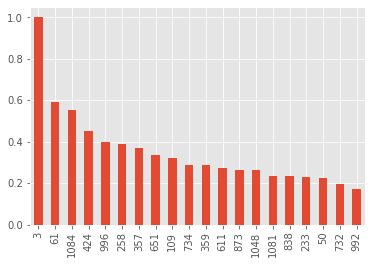

In [166]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [167]:
Oni['text'].loc[3]

'Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρωσική εκκλησία δημιουργήθηκε με απόφαση του στάλιν το 1943'

In [168]:
Oni['text'].loc[823]

'RT @AlexKokcharov: #Russia has agreed a 30-year contract to supply natural #gas to #China via a new pipeline and will settle the new gas sa…'

# Emolex Onidf

In [169]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [170]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [171]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [172]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [173]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [174]:
Oni_tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Oni.tsv", sep='\t')

In [175]:
len(Oni_tweets_df)

1132

In [176]:
short_tweets_Oni = Oni_tweets_df[['created_at','full_text' ]]
short_tweets_Oni = short_tweets_Oni.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [177]:
short_tweets_Oni.tail()

date  \
1127  Wed Apr 01 14:20:11 +0000 2020   
1128  Fri Sep 06 18:44:05 +0000 2019   
1129  Mon Apr 28 14:06:07 +0000 2014   
1130  Mon Apr 28 13:43:39 +0000 2014   
1131  Mon Feb 24 18:26:55 +0000 2014   

                                                   text  
1127  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...  
1128  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...  
1129  @POPOVRTR Международная журналистика вас не за...  
1130  Simon Ostrovsky tells the full story of his ab...  
1131                 Στο μπλόκο! http://t.co/o7jiqGUNqr

In [178]:
short_tweets_Oni.dtypes

date    object
text    object
dtype: object

In [179]:
short_tweets_Oni['date'] = pd.to_datetime(short_tweets_Oni['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [180]:
short_tweets_Oni['year'] = pd.DatetimeIndex(short_tweets_Oni['date']).year
short_tweets_Oni['month'] = pd.DatetimeIndex(short_tweets_Oni['date']).month
short_tweets_Oni['day'] = pd.DatetimeIndex(short_tweets_Oni['date']).day
short_tweets_Oni

date                                               text  \
0    2022-07-05 06:33:32  Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...   
1    2022-07-05 06:11:59  Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...   
2    2022-07-04 18:29:52  131η μέρα εισβολής - η φραουλολειχία της Μαρία...   
3    2022-07-04 12:58:14  Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρω...   
4    2022-07-03 21:00:44              @AikatBotsari https://t.co/JeTvI5MLcg   
...                  ...                                                ...   
1127 2020-04-01 14:20:11  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...   
1128 2019-09-06 18:44:05  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...   
1129 2014-04-28 14:06:07  @POPOVRTR Международная журналистика вас не за...   
1130 2014-04-28 13:43:39  Simon Ostrovsky tells the full story of his ab...   
1131 2014-02-24 18:26:55                 Στο μπλόκο! http://t.co/o7jiqGUNqr   

      year  month  day  
0     2022      7    5  
1     2022      7    5  
2     2022      7    4  
3     2022      7    4  
4     2022      7    3  
...    ...    ...  ...  
1127  2020      4    1  
1128  2019      9    6  
1129  2014      4   28  
1130  2014      4   28  
1131  2014      2   24  

[1132 rows x 5 columns]

In [181]:
short_tweets_Oni.dtypes

date     datetime64[ns]
text             object
year              int64
month             int64
day               int64
dtype: object

In [182]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [183]:
short_tweets_Oni['text'] = short_tweets_Oni['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [184]:
short_tweets_Oni.head()

date                                               text  \
0 2022-07-05 06:33:32  Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...   
1 2022-07-05 06:11:59  Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...   
2 2022-07-04 18:29:52  131η μέρα εισβολής - η φραουλολειχία της Μαρία...   
3 2022-07-04 12:58:14  Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρω...   
4 2022-07-03 21:00:44                                    @AikatBotsari     

   year  month  day  
0  2022      7    5  
1  2022      7    5  
2  2022      7    4  
3  2022      7    4  
4  2022      7    3

In [185]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [186]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets_Oni['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [187]:
wordcount_df.shape

(1132, 13161)

In [188]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [189]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [190]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']


In [191]:
short_tweets_Oni.head(3)

date                                               text  \
0 2022-07-05 06:33:32  Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...   
1 2022-07-05 06:11:59  Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...   
2 2022-07-04 18:29:52  131η μέρα εισβολής - η φραουλολειχία της Μαρία...   

   year  month  day  
0  2022      7    5  
1  2022      7    5  
2  2022      7    4

In [192]:
short_tweets_Oni['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets_Oni['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets_Oni['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets_Oni['disgust'] = wordcount_df[disgust_words].sum(axis=1)


short_tweets_Oni['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets_Oni['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets_Oni['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets_Oni['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets_Oni['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets_Oni['fear'] = wordcount_df[fear_words].sum(axis=1)


In [193]:
short_tweets_Oni

date                                               text  \
0    2022-07-05 06:33:32  Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ...   
1    2022-07-05 06:11:59  Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε ...   
2    2022-07-04 18:29:52  131η μέρα εισβολής - η φραουλολειχία της Μαρία...   
3    2022-07-04 12:58:14  Η άχρηστη πληροφορία της ημέρας: Η σημερινή ρω...   
4    2022-07-03 21:00:44                                    @AikatBotsari     
...                  ...                                                ...   
1127 2020-04-01 14:20:11  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...   
1128 2019-09-06 18:44:05  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...   
1129 2014-04-28 14:06:07  @POPOVRTR Международная журналистика вас не за...   
1130 2014-04-28 13:43:39  Simon Ostrovsky tells the full story of his ab...   
1131 2014-02-24 18:26:55                                      Στο μπλόκο!     

      year  month  day  anger  positivity  joy  disgust  surprise  trust  \
0     2022      7    5      0           0    0        0         0      0   
1     2022      7    5      0           0    0        0         0      0   
2     2022      7    4      0           0    0        0         0      0   
3     2022      7    4      0           1    1        0         0      1   
4     2022      7    3      0           0    0        0         0      0   
...    ...    ...  ...    ...         ...  ...      ...       ...    ...   
1127  2020      4    1      0           1    1        0         1      1   
1128  2019      9    6      1           0    0        0         1      0   
1129  2014      4   28      0           0    0        0         0      0   
1130  2014      4   28      0           0    0        0         0      0   
1131  2014      2   24      0           0    0        0         0      0   

      anticipation  sadness  negative  fear  
0                0        0         0     0  
1                0        0         0     0  
2                0        0         1     0  
3                1        0         0     0  
4                0        0         0     0  
...            ...      ...       ...   ...  
1127             1        0         0     0  
1128             2        1         2     2  
1129             0        0         0     0  
1130             0        0         0     0  
1131             0        0         0     0  

[1132 rows x 15 columns]

In [194]:
max = 0
happiest_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['positivity'] > max:
    happiest_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['positivity']


happiest_tweet

'RT @tzavelaniki: Η σκηνή με τον Πούτιν στην εκκλησία για την Ανάσταση, τελικά ήταν σκηνοθετημένη σε άδεια εκκλησία , όπου τραβήχτηκε το βίν…'

In [195]:
max = 0
negative_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['negative'] > max:
    negative_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['negative']


negative_tweet

'@SpUtNiKXRP δεν είναι ώρα για να συζητήσουμε τον ιστορικό ρόλο του  UPA ή κάποιοι άλλου. Εσείς βλέπετε το θέμα από τη δική σας σκοπιά, άλλοι από διαφορετική. Συγγνώμη που τα "κάναμε χάλια" και λερώσαμε το χαλί σας το αίμα μας. Τέλος συζήτησης.'

In [196]:
max = 0
saddest_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['sadness'] > max:
    saddest_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['sadness']

saddest_tweet

'Ακριβώς πριν 60 χρόνια, αφαιρέθηκε το μουμιοποιημένο πτώμα του δικτάτορα Ιωσήφ Τζουγκασβίλι (aka Στάλιν) από το μαυσωλείο στην Κόκκινη Πλατεία. Η μεταφορά και η ταφή έγιναν κρυφά, κατά τη διάρκεια νύχτας, σε άγνωστη τοποθεσία χωρίς διακριτικά. Όπως αξίζει σε ένα λυσσασμένο σκυλί.  '

In [197]:
max = 0
fear_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['fear'] > max:
    fear_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['fear']

In [198]:
max = 0
anger_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['anger'] > max:
    anger_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['anger']

anger_tweet

'Οι θηριωδίες της Μαριούπολης είναι πολλαπλάσιες της Μπούτσα. Δεν έχει τέλος η φρίκη. Την ίδια ώρα οι ρώσοι μαζεύουν στρατό για νέα μεγάλη επίθεση.  '

In [199]:
max = 0
trust_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['trust'] > max:
    trust_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['trust']

trust_tweet

'RT @tzavelaniki: Η σκηνή με τον Πούτιν στην εκκλησία για την Ανάσταση, τελικά ήταν σκηνοθετημένη σε άδεια εκκλησία , όπου τραβήχτηκε το βίν…'

In [200]:
short_tweets_Oni.set_index('date' , inplace=True)

In [201]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

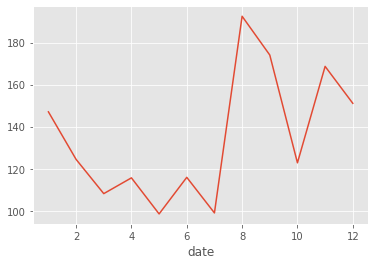

In [202]:
short_tweets_Oni['text'].str.len().groupby(by=short_tweets_Oni.index.month).mean().plot()

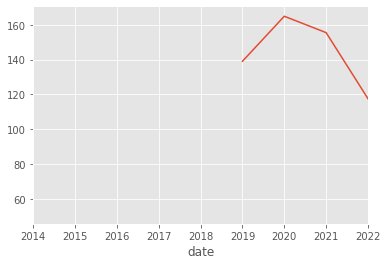

In [203]:
short_tweets_Oni['text'].str.len().resample('A').mean().plot() 

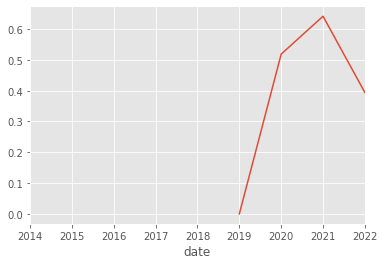

In [204]:
short_tweets_Oni['positivity'].resample('A').mean().plot() 

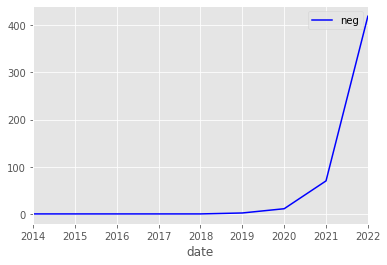

In [205]:
short_tweets_Oni['negative'].resample('A').sum().plot(color = 'b',label = 'neg').legend() 

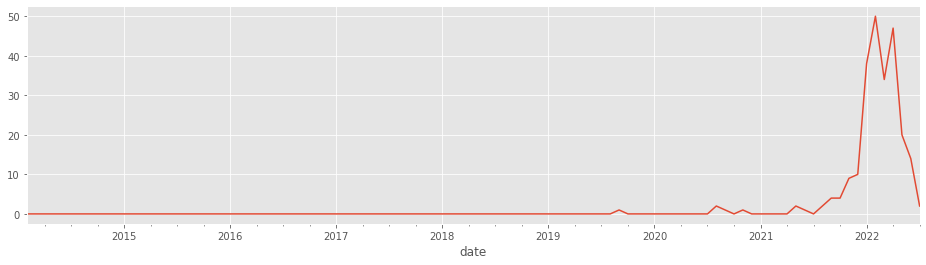

In [206]:
short_tweets_Oni['anger'].resample('M').sum().plot(figsize=(16,4))

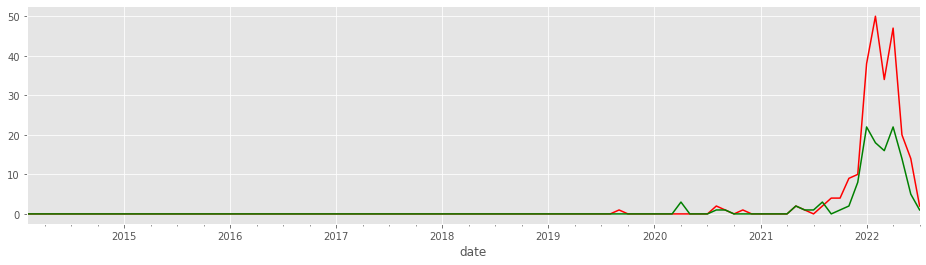

In [207]:
ax = short_tweets_Oni['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Oni['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

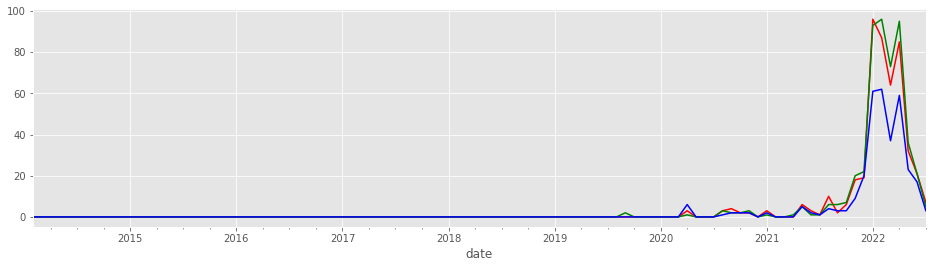

In [208]:
ax = short_tweets_Oni['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Oni['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets_Oni['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

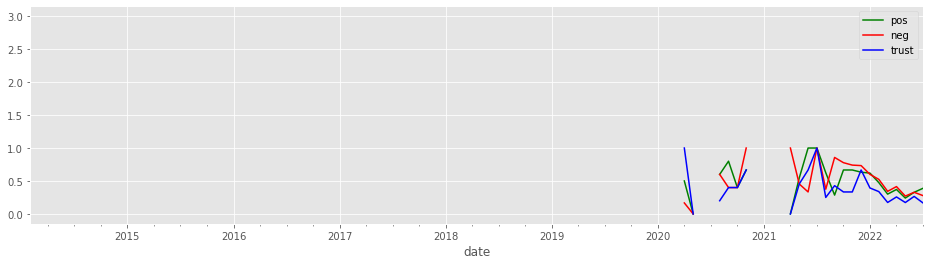

In [209]:
ax = short_tweets_Oni['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Oni['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Oni['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

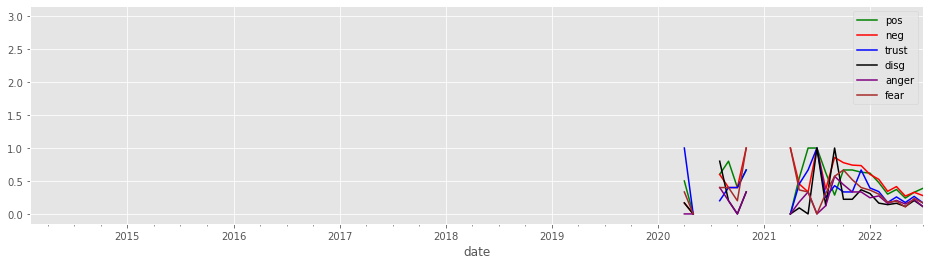

In [210]:
plt.style.use('ggplot')
ax = short_tweets_Oni['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Oni['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Oni['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

short_tweets_Oni['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

short_tweets_Oni['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

short_tweets_Oni['fear'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

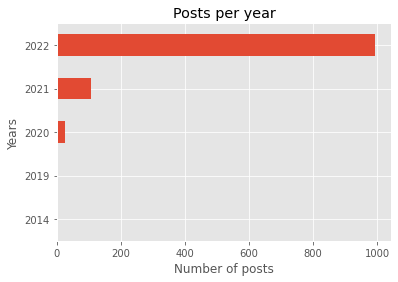

In [211]:
short_tweets_Oni['text'].groupby(by=short_tweets_Oni.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Month of the year')

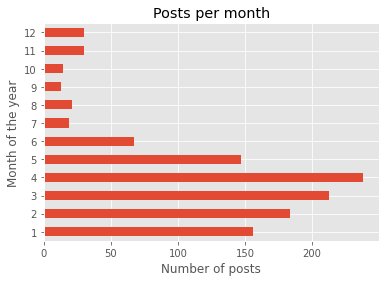

In [212]:
short_tweets_Oni['text'].groupby(by=short_tweets_Oni.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Month of the year")

Text(0, 0.5, 'Hour of the day')

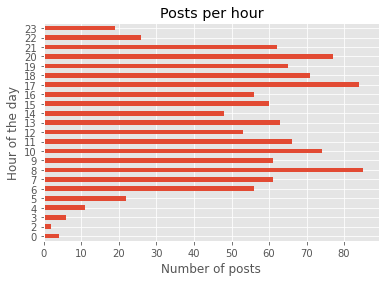

In [213]:
short_tweets_Oni['text'].groupby(by=short_tweets_Oni.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

# Avgerdf - Onidf

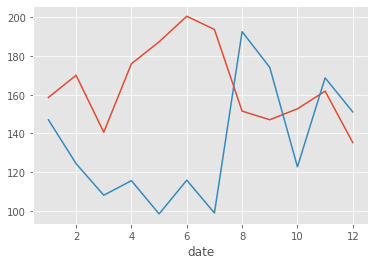

In [214]:
short_tweets_Avger['text'].str.len().groupby(by=short_tweets_Avger.index.month).mean().plot()
short_tweets_Oni['text'].str.len().groupby(by=short_tweets_Oni.index.month).mean().plot()

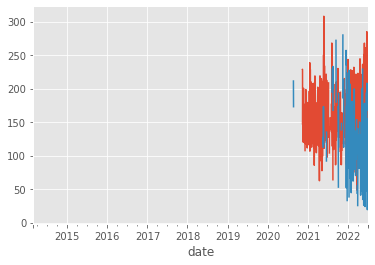

In [215]:
short_tweets_Avger['text'].str.len().resample('D').mean().plot() 
short_tweets_Oni['text'].str.len().resample('D').mean().plot() 

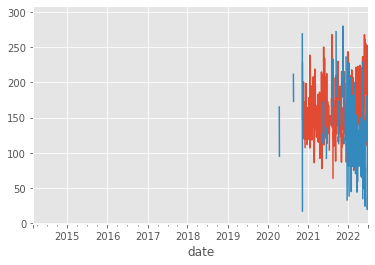

In [216]:
short_tweets_Avger['text'].str.len().resample('B').mean().plot() 
short_tweets_Oni['text'].str.len().resample('B').mean().plot() 

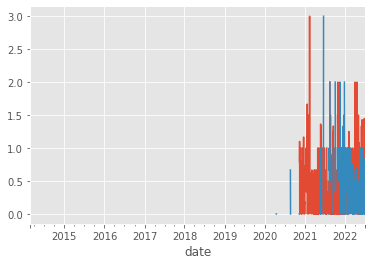

In [217]:
short_tweets_Avger['positivity'].resample('B').mean().plot() 
short_tweets_Oni['positivity'].resample('B').mean().plot() 

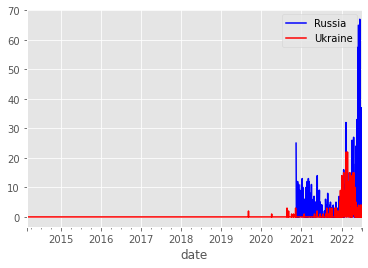

In [218]:
short_tweets_Avger['negative'].resample('B').sum().plot(color = 'b',label = 'Russia').legend() 
short_tweets_Oni['negative'].resample('B').sum().plot(color = 'r',label = 'Ukraine').legend() 

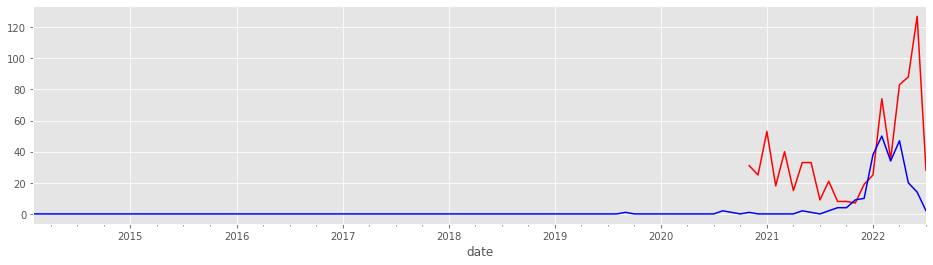

In [219]:
short_tweets_Avger['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Oni['anger'].resample('M').sum().plot(figsize=(16,4), color = 'blue')

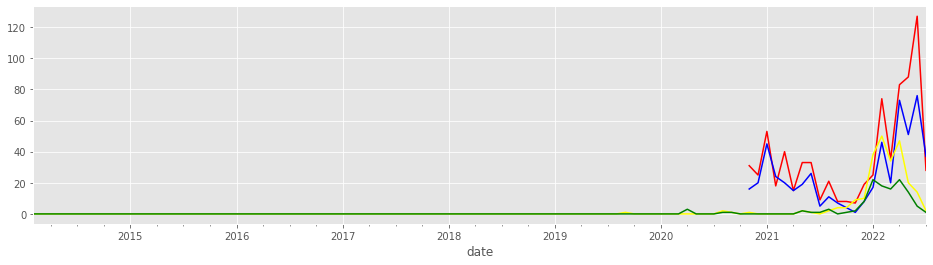

In [220]:
ax = short_tweets_Avger['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Avger['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
ax = short_tweets_Oni['anger'].resample('M').sum().plot(figsize=(16,4), color = 'yellow')
short_tweets_Oni['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

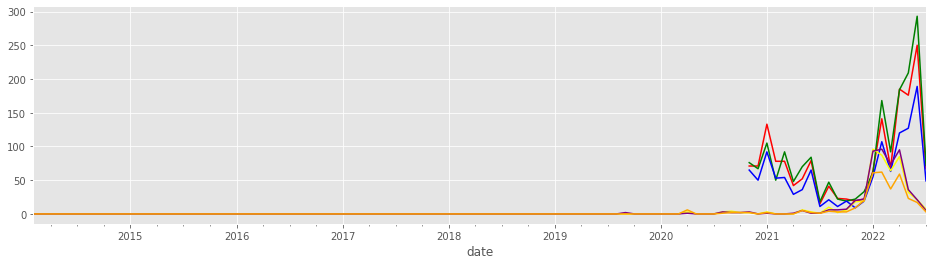

In [221]:
ax = short_tweets_Avger['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Avger['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets_Avger['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
ax = short_tweets_Oni['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'yellow')
short_tweets_Oni['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'purple')
short_tweets_Oni['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'orange')

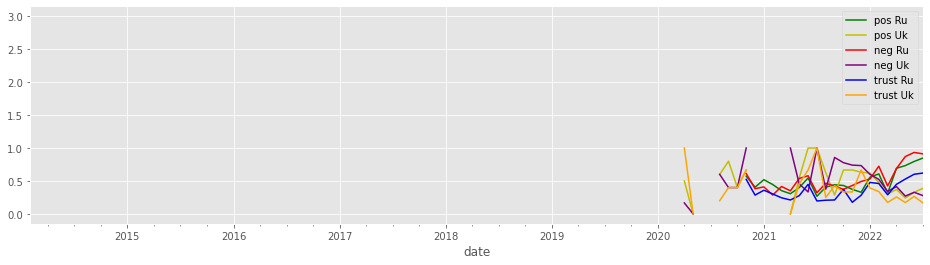

In [222]:
ax = short_tweets_Avger['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos Ru')
ax = short_tweets_Oni['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'y', label='pos Uk')
short_tweets_Avger['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Ru', color = 'r')
short_tweets_Oni['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Uk', color = 'purple')
short_tweets_Avger['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Ru',color = 'blue').legend()
short_tweets_Oni['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Uk',color = 'orange').legend()

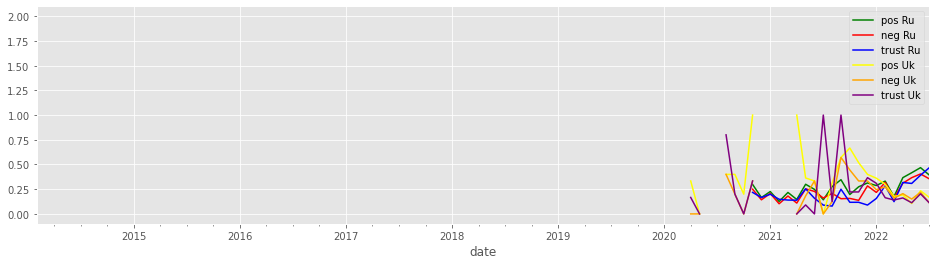

In [223]:
plt.style.use('ggplot')
ax = short_tweets_Avger['fear'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos Ru')
short_tweets_Avger['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Ru', color = 'r')
short_tweets_Avger['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Ru',color = 'blue').legend()    
short_tweets_Oni['fear'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'yellow', label='pos Uk')
short_tweets_Oni['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Uk', color = 'orange')
short_tweets_Oni['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Uk',color = 'purple').legend()                                                